### Project ML for Aging & Longevity Sommersemester 2025 

# Predicting Cardiovascular Disease Using Machine Learning: A Comparative Model Evaluation

## Contributors
- Thi An Nguyen Phan
- Bang Tu Nguyen

### Both team members contribute equally to the completion of the project



# 1. Dataset Selection

### Dataset description
This dataset contains medical examination data for a large number of individuals, with the goal of predicting the presence or absence of cardiovascular disease. Each row represents a single patient and includes both medical measurements and self-reported lifestyle factors taken at the time of the examination.

The dataset consists of 11 input features and 1 target variable:

Feature Categories:
1. Objective: factual information
- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code |

2. Examination: results of medical examination
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

3. Subjective: information given by the patient.
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |

Target variable:
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary 0: no, 1: yes|
All of the dataset values were collected at the moment of medical examination.

Data Characteristics:
- All features were captured during a single medical examination.
- The dataset contains both continuous and categorical variables, making it suitable for a wide range of machine learning models.
- It is ideal for exploring health risk prediction, feature importance analysis, and model interpretability in the medical domain.

### Justification for dataset choice
#### Suitability for ML analysis
This datatset is suitable for a ML classification task, particularly binary classificaiton, as it aims to predict whether an individual has cardiovascular disease or not

Reason for suitability:
1. CLear target variable: the cardio column provides a well-defined binary target, ideal for supervised learning
2. Richness of features:
   The dataset includes diverse types of features:
   - Objective: Demographic and measurable heath metrics (e.g. age, height, weight, etc.)
   - Examination: Clinical indicators like blood pressure and cholesterol
   - Subjective: Lifestyle factors (e.g. smoking, alcohol, activity)
     -> This diversity supports multi-dimensional analysis, allowing the model to learn complex relationships between health/ lifestyle factors and cardiovascular outcomes.
3. Structured Data:
   All features are numerical or ordinal categorical, which simplifies preprocessing and is compatiable with many standard ML algorithms (e.g. logistics regression, decision trees, random forests, etc.)
4. Real-world relevance:
   Predicting cardiovascular risk has real-world applications in healthcare

#### Known limitations of the dataset
This dataset has limitations that should be acknowledged:
1. Missing data:
   - Some columns of this dataset contain missing values, which are important to be investigated, especially if using algorithms sensitive to them
2. Outlier:
   - Some values in the column "weight" may be outliers or errors, requiring cleaning or imputation
3. Demographic limitations:
   - The dataset may lack demographic diversity, which can limit the generalizability of any model trained on it. For example, the gender distribution is imbalanced, with more male records than female, potentially leading to bias in model performance across genders.
   - Additionally, since the dataset originates from a specific region or population (details not fully disclosed), it may not capture the full variation in ethnicity, socioeconomic status, or global health patterns, further restricting its applicability to broader or more diverse populations
   - These imbalances can introduce bias into machine learning models, potentially leading to unfair or inaccurate predictions for underrepresented groups. 

The dataset includes sensitive personal and health-related information, such as age, blood pressure, and lifestyle habits. However, since the data was obtained from Kaggle, the original data collection process is not fully documented, and it is unclear whether informed consent was obtained or what ethical protocols were followed. This limits the ability to assess the dataset’s compliance with privacy regulations such as GDPR.



# Read in the dataset
Data should be put in the "data" folder. Make sure csv files are closed before loading. Otherwise the code will fail.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import missingno as msno
import miceforest as mf
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import miceforest as mf
import math

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
# Load Data
df = pd.read_csv("data/data_with_missing_values.csv",sep=";")


#### This is the meaning of the columns in the data

| Feature                                  | Type                 | Column Name | Data Type / Values                                          |
|------------------------------------------|----------------------|-------------|--------------------------------------------------------------|
| Age                                      | Objective Feature     | `age`       | int (days)                                                   |
| Height                                   | Objective Feature     | `height`    | int (cm)                                                     |
| Weight                                   | Objective Feature     | `weight`    | float (kg)                                                   |
| Gender                                   | Objective Feature     | `gender`    | categorical code (1 = male, 2 = female)                      |
| Systolic blood pressure                  | Examination Feature   | `ap_hi`     | int                                                          |
| Diastolic blood pressure                 | Examination Feature   | `ap_lo`     | int                                                          |
| Cholesterol                              | Examination Feature   | `cholesterol`| 1 = normal, 2 = above normal, 3 = well above normal          |
| Glucose                                  | Examination Feature   | `gluc`      | 1 = normal, 2 = above normal, 3 = well above normal          |
| Smoking                                  | Subjective Feature    | `smoke`     | binary (0 = no, 1 = yes)                                     |
| Alcohol intake                           | Subjective Feature    | `alco`      | binary (0 = no, 1 = yes)                                     |
| Physical activity                        | Subjective Feature    | `active`    | binary (0 = no, 1 = yes)                                     |
| Presence of cardiovascular disease       | Target Variable       | `cardio`    | binary (0 = no, 1 = yes)                                     |


In [3]:
#show data head
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393.0,2.0,168.0,62.0,NaN,80.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1,20228.0,1.0,156.0,85.0,140.0,NaN,3.0,1.0,0.0,NaN,1.0,1.0
2,2,18857.0,1.0,165.0,64.0,130.0,NaN,3.0,1.0,NaN,0.0,NaN,1.0
3,3,17623.0,2.0,169.0,82.0,150.0,100.0,NaN,1.0,0.0,NaN,1.0,1.0
4,4,17474.0,1.0,156.0,56.0,100.0,60.0,1.0,1.0,0.0,NaN,0.0,0.0


In [4]:
#show data tail
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240.0,2.0,168.0,76.0,120.0,NaN,1.0,1.0,NaN,0.0,NaN,0.0
69996,99995,22601.0,1.0,158.0,126.0,140.0,90.0,NaN,2.0,0.0,NaN,1.0,1.0
69997,99996,19066.0,2.0,183.0,105.0,180.0,90.0,3.0,1.0,0.0,1.0,0.0,1.0
69998,99998,22431.0,1.0,NaN,72.0,135.0,80.0,1.0,NaN,0.0,0.0,0.0,1.0
69999,99999,20540.0,1.0,NaN,72.0,120.0,80.0,NaN,1.0,0.0,0.0,1.0,0.0


📄 Dataset Overview
The dataset comprises health-related features collected from individuals during medical examinations. The central goal is to predict whether a person has cardiovascular disease (cardio column: 0 = no disease, 1 = disease). It includes:

Objective features: Directly measured values such as age (in days), height, weight, and blood pressure.

Examination features: Lab results such as cholesterol and glucose levels.

Subjective features: Self-reported lifestyle attributes like smoking, alcohol intake, and physical activity.


🔍 Initial Observations

Target variable: Binary indicator (cardio) representing the presence of cardiovascular disease.

Missing data: Several fields (e.g. ap_lo, cholesterol, gluc, active) contain NaN values that must be addressed in preprocessing.

Feature types: A mix of categorical (e.g., cholesterol, gluc, gender), numerical (e.g., height, weight), and binary indicators.

Medical relevance: Variables are aligned with risk factors for cardiovascular conditions, making this a meaningful classification problem in the health domain.



🎯 Goal for Machine Learning
Use the features to train and evaluate machine learning models that can classify whether a patient is likely to suffer from cardiovascular disease. This supports the broader goal of predictive healthcare and early intervention, potentially aiding medical decision-making.

# 2. Exploratory Data Analysis

### 2.1 Descriptive statistics

#### 2.1.1 Basis check

In [5]:
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])

Number of rows: 70000
Number of columns: 13


In [6]:
# Examine data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          49643 non-null  float64
 2   gender       69286 non-null  float64
 3   height       53210 non-null  float64
 4   weight       70000 non-null  float64
 5   ap_hi        57314 non-null  float64
 6   ap_lo        50576 non-null  float64
 7   cholesterol  56876 non-null  float64
 8   gluc         63681 non-null  float64
 9   smoke        49996 non-null  float64
 10  alco         56669 non-null  float64
 11  active       60360 non-null  float64
 12  cardio       70000 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 6.9 MB


#### 2.1.2 Check duplicates

In [7]:
duplicate_indices = df[df['id'].duplicated(keep=False)].index
duplicate_indices

Index([], dtype='int64')

In [8]:
data_dup = df.duplicated ().any()
print (data_dup)

False


No duplicates were found

#### 2.1.3 Check missing values

In [9]:
df.isna().sum()

id                 0
age            20357
gender           714
height         16790
weight             0
ap_hi          12686
ap_lo          19424
cholesterol    13124
gluc            6319
smoke          20004
alco           13331
active          9640
cardio             0
dtype: int64

In [10]:
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

# Combine into one DataFrame
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missingness rate in %': missing_percent.round(2)
})

missing_df = missing_df[missing_df['Missing Count'] > 0]  # Show only columns with missing values
print(missing_df)

             Missing Count  Missingness rate in %
age                  20357                  29.08
gender                 714                   1.02
height               16790                  23.99
ap_hi                12686                  18.12
ap_lo                19424                  27.75
cholesterol          13124                  18.75
gluc                  6319                   9.03
smoke                20004                  28.58
alco                 13331                  19.04
active                9640                  13.77


All columns has missingness rate less than 30%, therefore no need to delete any features column-wise. Nevertheless, the column "id" is considered as irrelavant for building model and therefore it will be removed in the next step.

In [11]:
print("Number of missing values in 'cardio':", df['cardio'].isna().sum())

Number of missing values in 'cardio': 0


As target variable "cardio" does not contain NA, so we do not need to drop the rows with NA in target variable here

<Axes: >

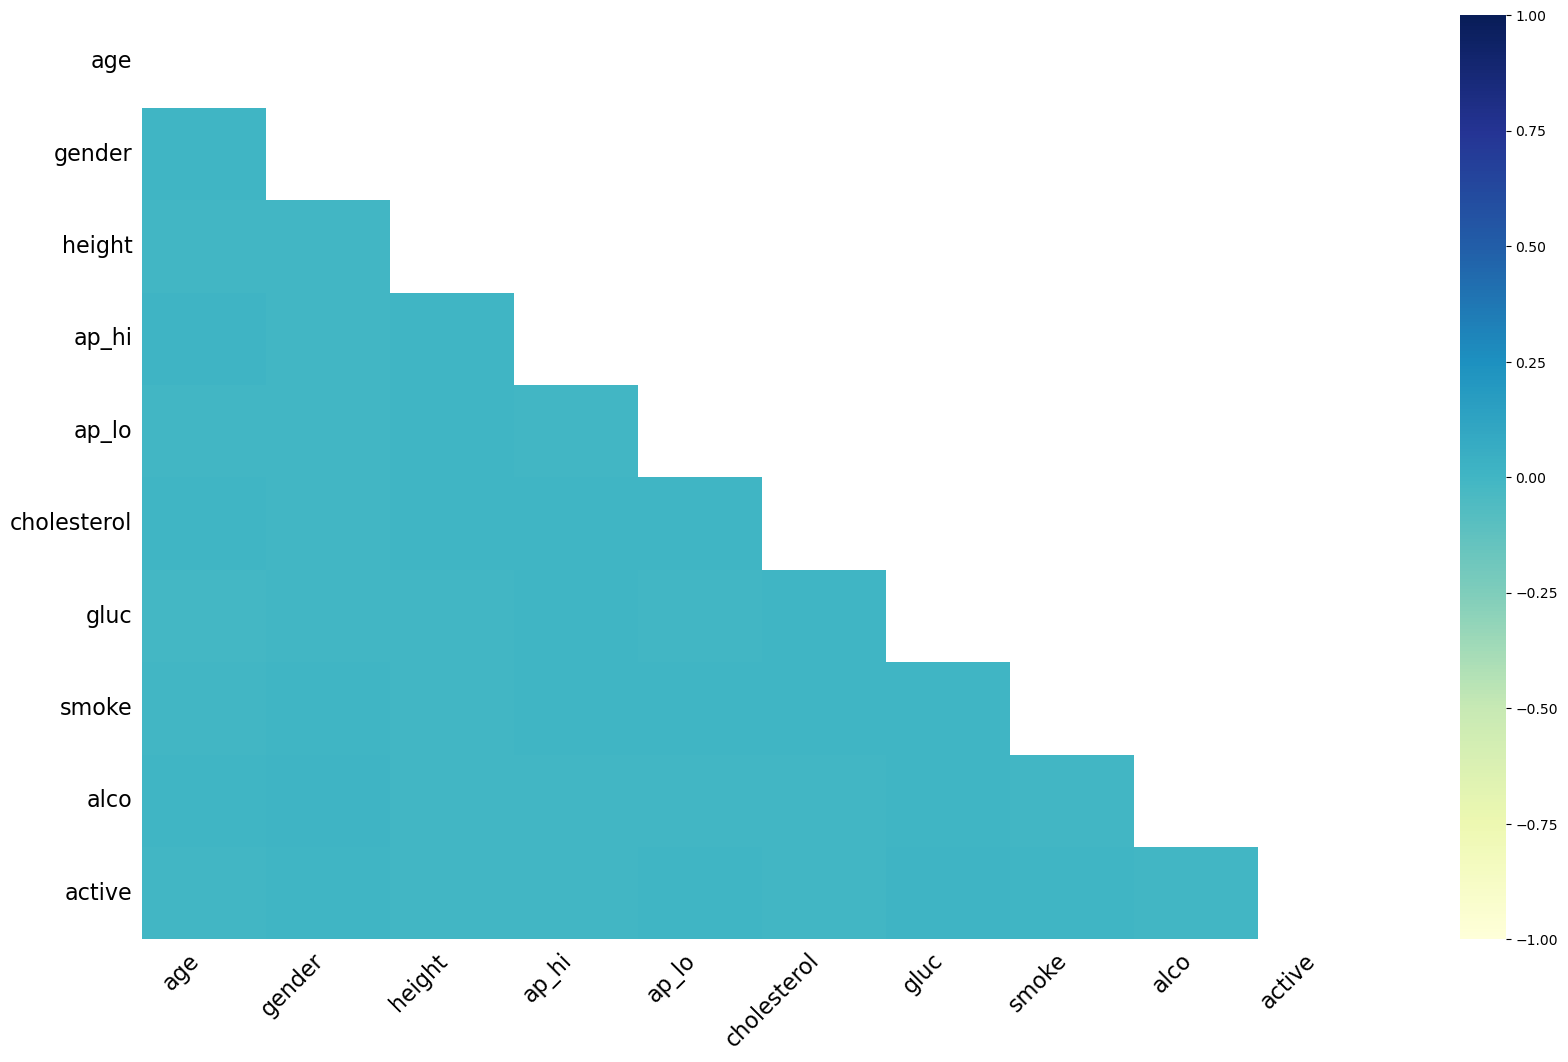

In [12]:
# Visualise missing values
msno.heatmap(df, cmap='YlGnBu')

We can see that there is very litte or no correlation between the missing values across features. Most features (both numerical and categorical) have missingness patterns that are random (MAR) and uncorrelated. Therefore, MICE (Multiple Imputation by Chained Equations) with a LightGBM backend wil be used in the next step to treat missing values. MICE treats each variable with missing values as a dependent variable, predicting it using the other features iteratively. With a LightGBM backend, it provides fast, GPU-accelerated imputations, handles categorical variables, and achieves high predictive accuracy, making it well-suited for preparing reliable data for our classification models.


In [13]:
#Drop irrevalant column "id"
df=df.drop("id",axis=1)

In [14]:
#Data shape after removing coumn
df.shape

(70000, 12)

#### 2.1.4 Statistical measure of data

In [15]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,49643.000000,69286.000000,53210.000000,70000.000000,57314.000000,50576.000000,56876.000000,63681.000000,49996.000000,56669.000000,60360.000000,70000.000000
mean,19468.172351,1.349364,164.368389,74.205690,128.216666,96.889908,1.365954,1.226692,0.088427,0.053327,0.803810,0.499700
std,2466.608531,0.476772,8.201434,14.395757,127.352240,203.379823,0.680672,0.572390,0.283918,0.224687,0.397117,0.500003
min,10798.000000,1.000000,57.000000,10.000000,-150.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17674.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19698.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21321.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23701.000000,2.000000,207.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### 2.2 Univarate Analysis & Check outliers

#### 2.2.1 Categorical Features

In [16]:
binary_cols = ["gender","cholesterol","gluc",'smoke', 'alco', 'active',"cardio"] 
binary_feature_cols = ["gender","cholesterol","gluc",'smoke', 'alco',"active"] 
for col in binary_cols:
    df[col]=df[col].astype("category")
df.dtypes

age             float64
gender         category
height          float64
weight          float64
ap_hi           float64
ap_lo           float64
cholesterol    category
gluc           category
smoke          category
alco           category
active         category
cardio         category
dtype: object

In [17]:
#Check uniqueness of all categorical features
for col in binary_cols:
        print(f"Values in the column {col}: {df[col].unique()}")

Values in the column gender: [2.0, 1.0, NaN]
Categories (2, float64): [1.0, 2.0]
Values in the column cholesterol: [1.0, 3.0, NaN, 2.0]
Categories (3, float64): [1.0, 2.0, 3.0]
Values in the column gluc: [1.0, 2.0, 3.0, NaN]
Categories (3, float64): [1.0, 2.0, 3.0]
Values in the column smoke: [0.0, NaN, 1.0]
Categories (2, float64): [0.0, 1.0]
Values in the column alco: [0.0, NaN, 1.0]
Categories (2, float64): [0.0, 1.0]
Values in the column active: [1.0, NaN, 0.0]
Categories (2, float64): [0.0, 1.0]
Values in the column cardio: [0.0, 1.0]
Categories (2, float64): [0.0, 1.0]


This looks ok

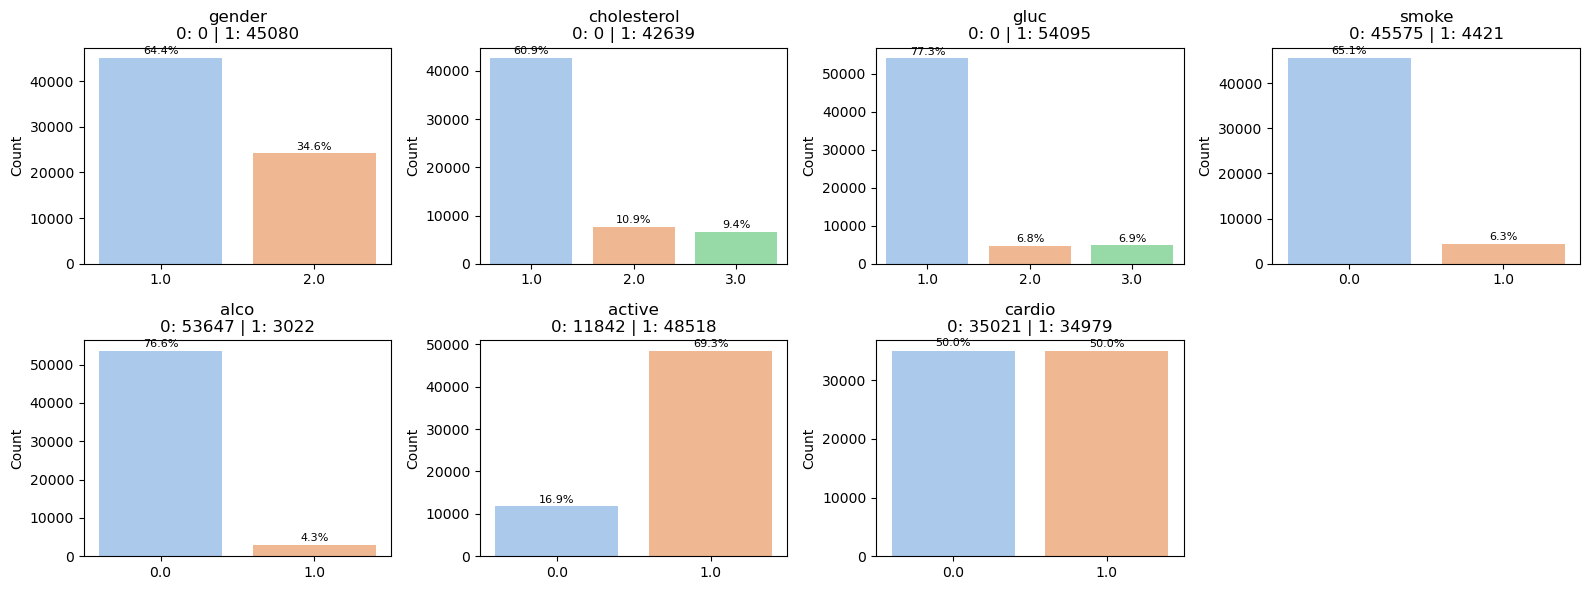

In [18]:
# Arrange subplots: 2 rows and 4 columns 
n_cols = 4
n_rows = -(-len(binary_cols) // n_cols)  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten() 

for i, col in enumerate(binary_cols):
    sns.countplot(x=col, data=df, palette='pastel', ax=axes[i])
    total = len(df)
    counts = df[col].value_counts()
    
    # Set plot title with value counts
    axes[i].set_title(f'{col}\n0: {counts.get(0, 0)} | 1: {counts.get(1, 0)}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    
    # Add percentage labels on each bar
    for p in axes[i].patches:
        height = p.get_height()
        pct = height / total * 100
        axes[i].text(p.get_x() + p.get_width()/2, height + total * 0.005,
                     f'{pct:.1f}%', ha='center', va='bottom', fontsize=8)

# Remove empty subplots (if there are more axes than variables)
for j in range(len(binary_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Observations:
- There is imbalance in gender, more male (64,4%) than female (34,6%)
- No imbalance in target variable "cardio"

#### 2.2.2 Numerical Features

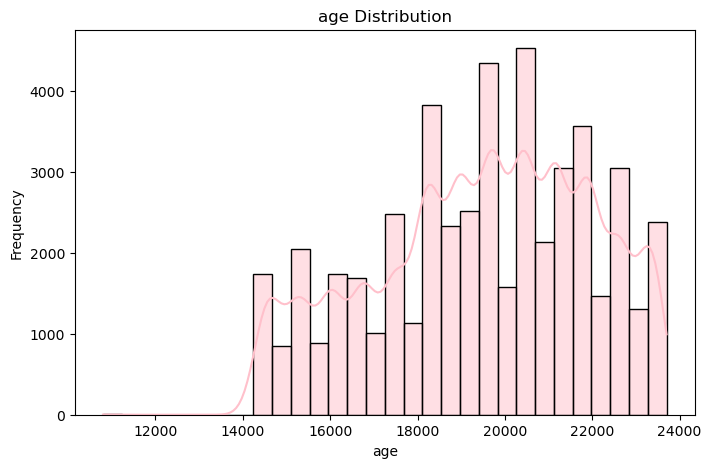

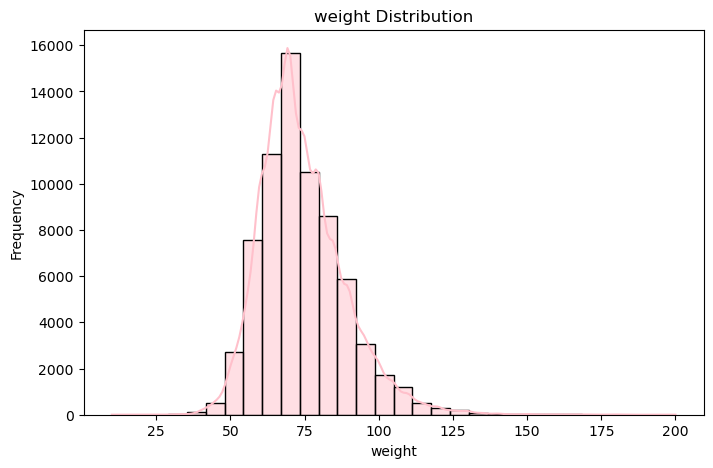

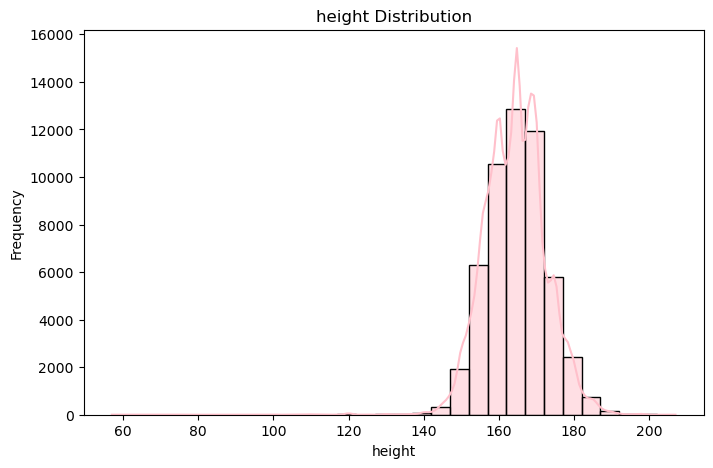

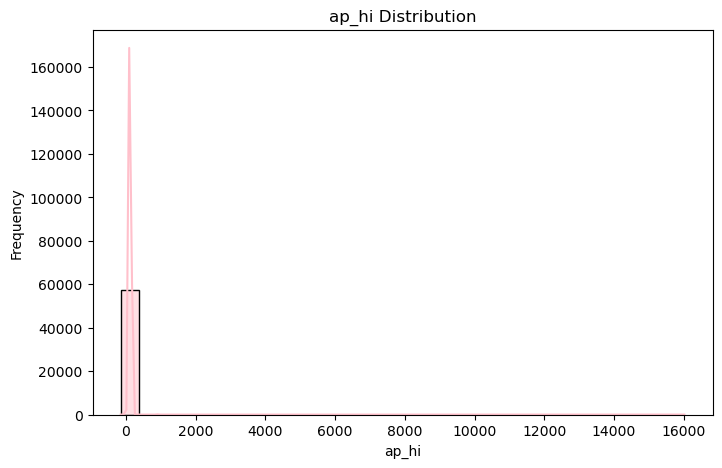

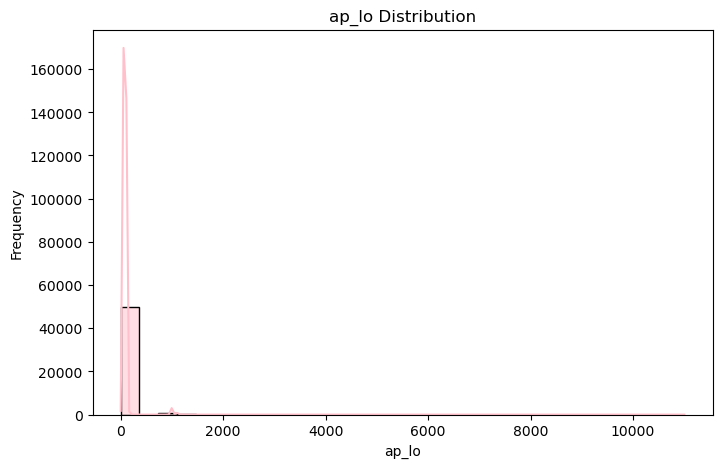

<Figure size 640x480 with 0 Axes>

In [19]:
numerical_cols = ['age', 'weight', 'height', "ap_hi", "ap_lo"]
 #Visualization with histogramms
for feature in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature].dropna(), kde=True, bins=30, color='pink')
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(False) 
    plt.show()
plt.tight_layout()

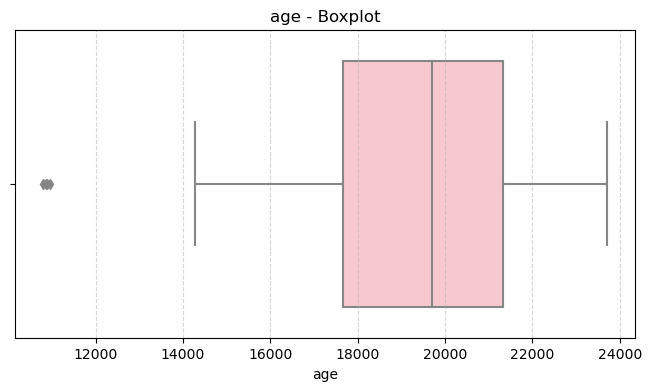

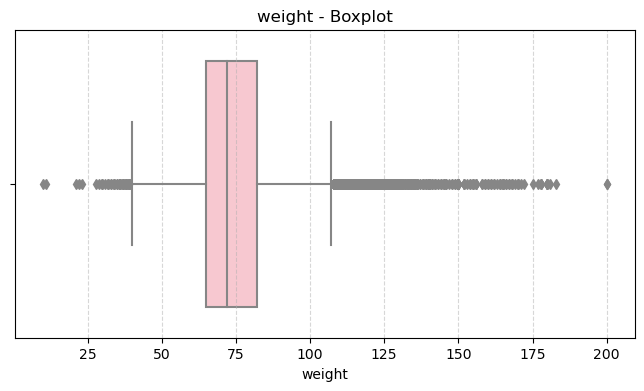

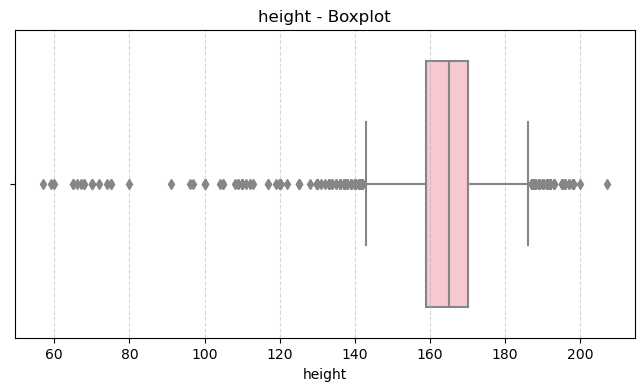

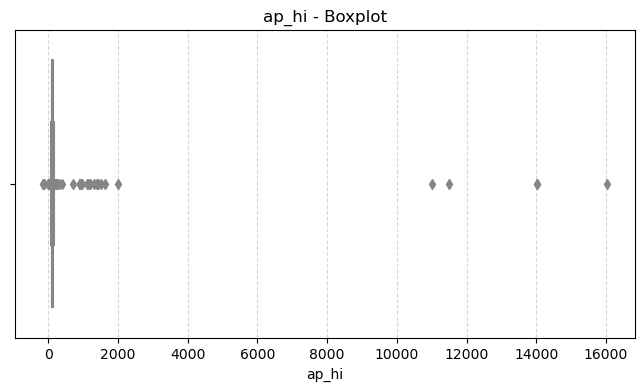

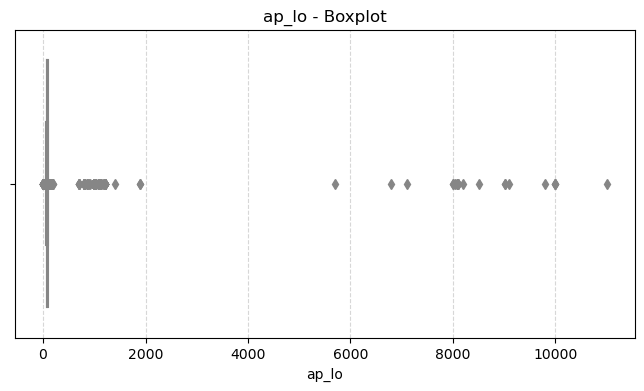

<Figure size 640x480 with 0 Axes>

In [20]:
#Visualization with boxplots to identify outliers
for feature in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature].dropna(), orient='h', color='pink')
    plt.title(f'{feature} - Boxplot')
    plt.xlabel(feature)
    plt.grid(axis='x', linestyle='--', alpha=0.5)  # Add light horizontal grid lines
    plt.show()

plt.tight_layout()

From our statistical measures above and visualizations of numerical features, we identified numerous outliers in the dataset. For instance, the ap_hi (systolic blood pressure) column contains negative values, which are physiologically implausible. To ensure data quality and reliability, we will address these anomalies during the preprocessing stage by removing or correcting such invalid entries. Let's now take a closer look at these outliers in more detail.

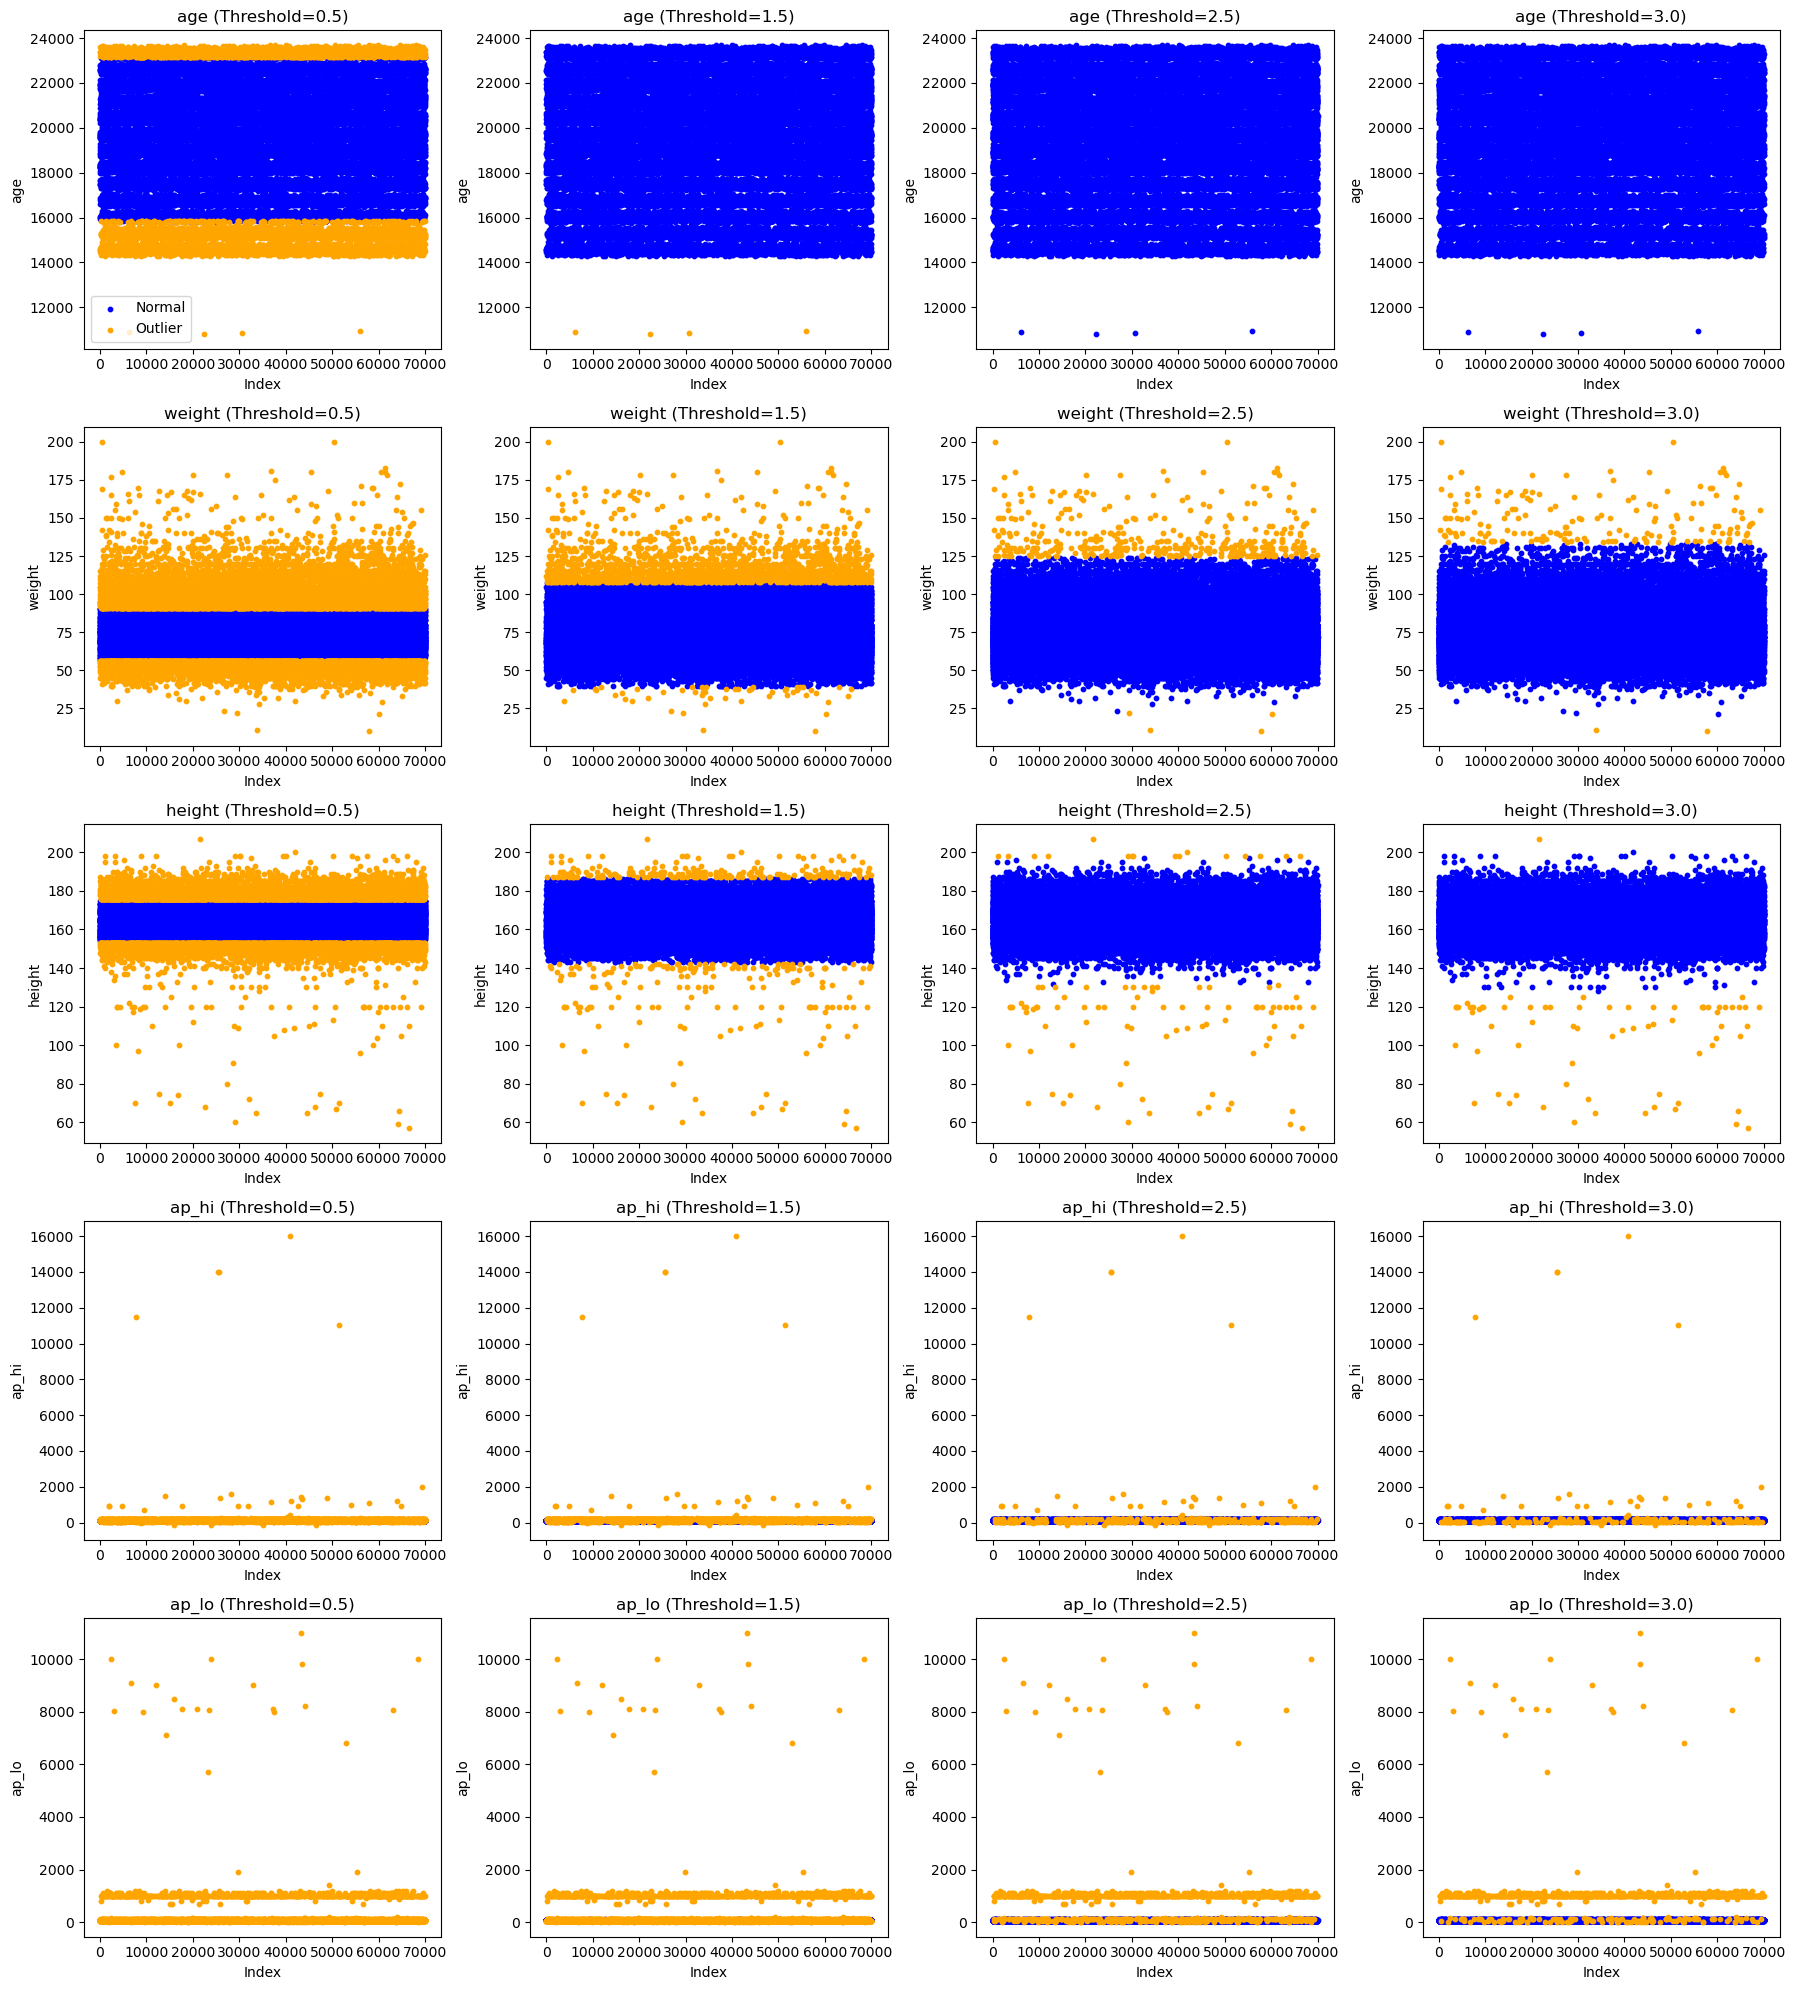

In [21]:
# Function to calculate IQR-based outliers
def iqr_outliers(series, threshold=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)
    return (series < lower_bound) | (series > upper_bound)

# Function to visualize outliers across multiple thresholds
def visualize_iqr_thresholds(df, columns, thresholds):
    plt.figure(figsize=(18, len(columns) * 4))
    for i, column in enumerate(columns, 1):
        for j, threshold in enumerate(thresholds, 1):
            plt.subplot(len(columns), len(thresholds), (i - 1) * len(thresholds) + j)
            outliers = iqr_outliers(df[column], threshold=threshold)
            plt.scatter(df.index[~outliers], df[column][~outliers], s=10, label="Normal", color="blue")
            plt.scatter(df.index[outliers], df[column][outliers], s=10, label="Outlier", color="orange")
            plt.title(f"{column} (Threshold={threshold})")
            plt.xlabel("Index")
            plt.ylabel(column)
            if i == 1 and j == 1:
                plt.legend()
    plt.tight_layout()
    plt.show()

# Define thresholds to explore
iqr_thresholds = [0.5, 1.5, 2.5, 3.0]

# Call the function with your dataframe and columns
visualize_iqr_thresholds(df, numerical_cols, iqr_thresholds)

#### 📍Based on the visualisation above, we determine the threshold by 2.5 to remove outliers using IQR-based capping in the data preprocessing step.

In [22]:
# With threshold 2,5, following amount of outliers is detected
z_thresh = 2.5
for col in numerical_cols:
    # Convert to Z-scores
    df[f'{col}_z'] = zscore(df[col])
    
    # Mark outliers
    df[f'{col}_outlier'] = np.abs(df[f'{col}_z']) > z_thresh
    
    # Count number of outliers
    outlier_count = np.sum(df[f'{col}_outlier'])
    print(f"{col}: {outlier_count} outliers")


age: 0 outliers
weight: 1290 outliers
height: 0 outliers
ap_hi: 0 outliers
ap_lo: 0 outliers


### 2.3 Multivariate analysis

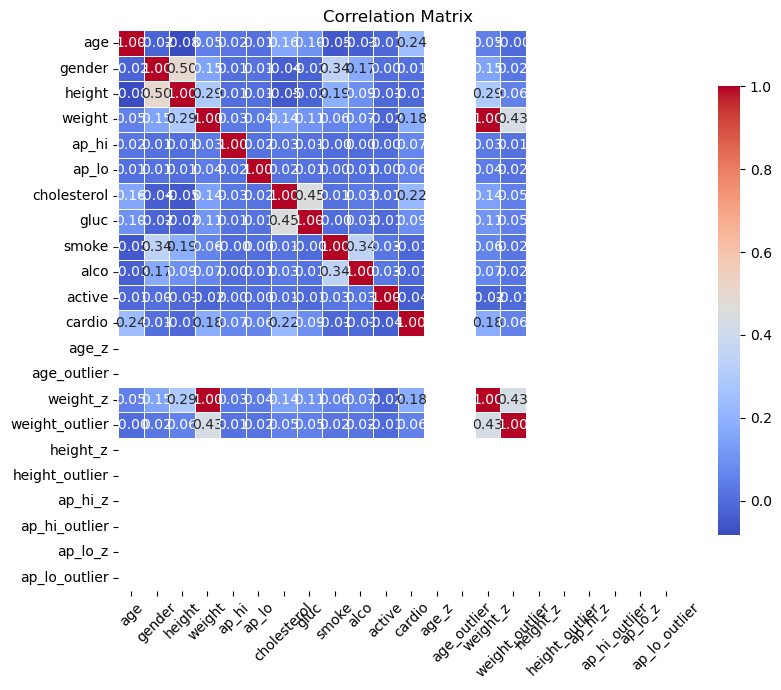

In [23]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, 
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

There are no columns that perfectly correlate with the target "cardio". Therefore no data leakage is found here.

Additionally, there are moderate correlations between "gender" and "height", "gluc" and "cholesterol".

C:\Users\ptang\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


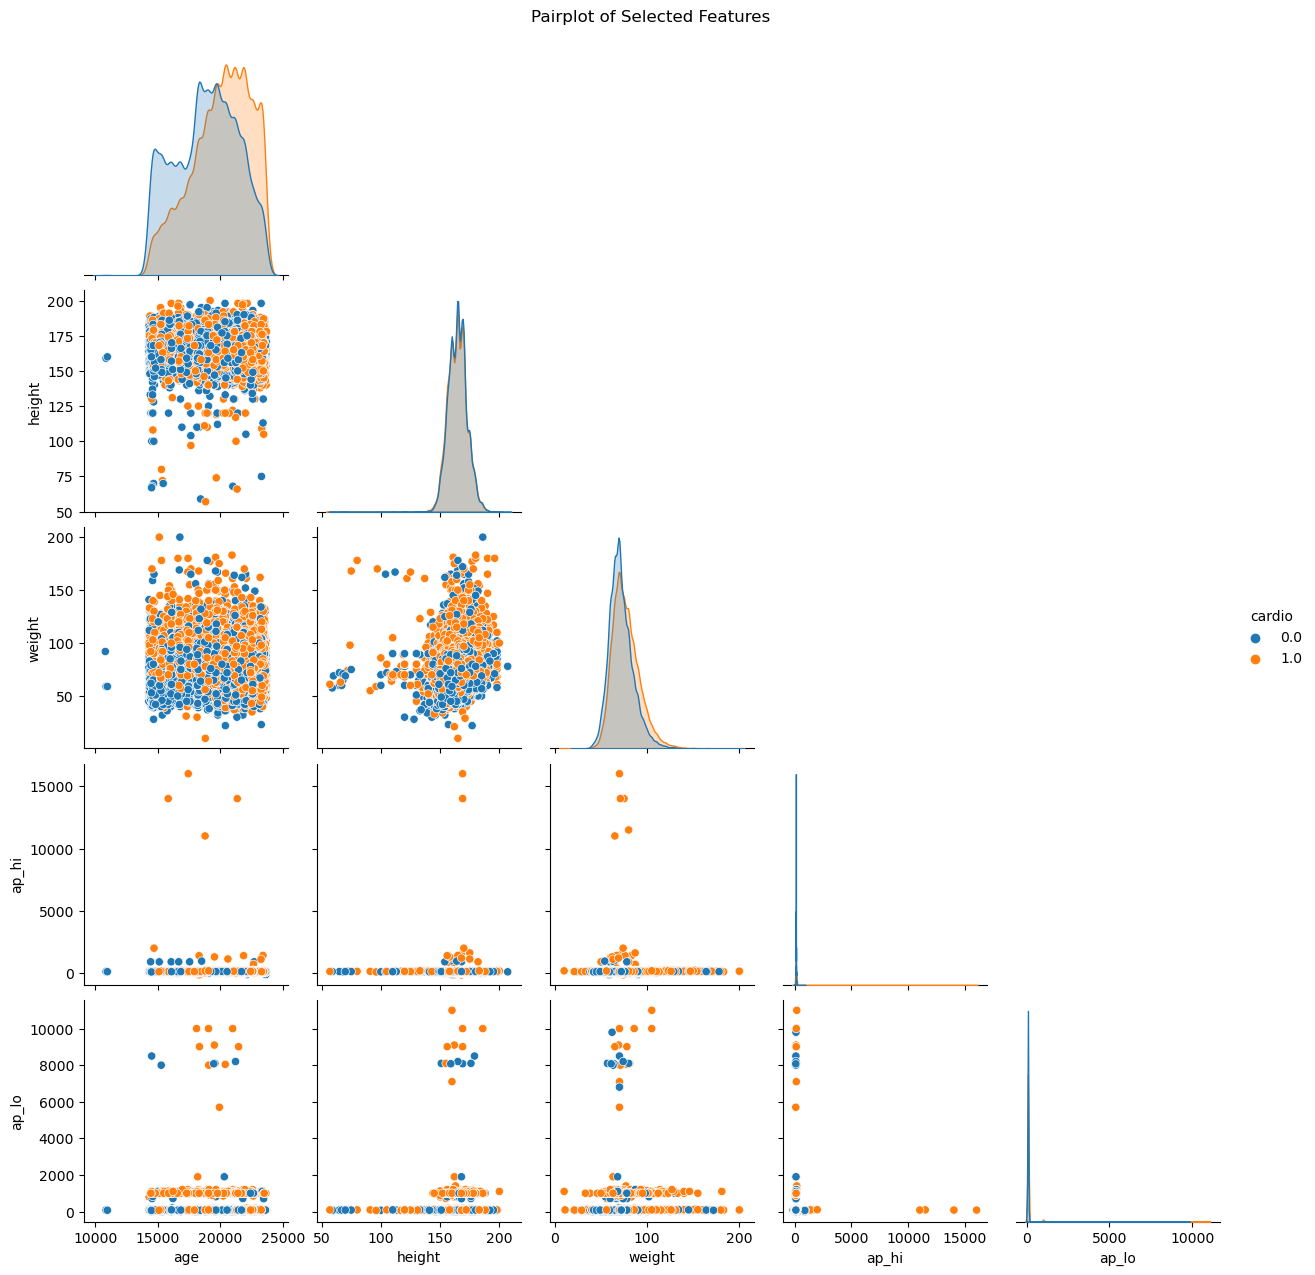

In [24]:
#Explore interactions across multiple features
selected_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cardio']
sns.pairplot(df[selected_cols], hue='cardio', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


## 2.4 Analysis of the target variable

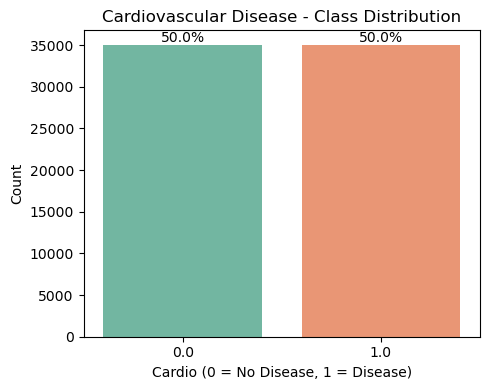

In [25]:
plt.figure(figsize=(5, 4))
sns.countplot(x='cardio', data=df, palette='Set2')
plt.title('Cardiovascular Disease - Class Distribution')
plt.xlabel('Cardio (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')

# Add percentages on top of bars
total = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    pct = f'{100 * height / total:.1f}%'
    plt.gca().text(p.get_x() + p.get_width() / 2, height, pct, ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [26]:
cardio_counts = df['cardio'].value_counts()
cardio_percent = df['cardio'].value_counts(normalize=True) * 100
display(pd.DataFrame({'Count': cardio_counts, 'Percent': cardio_percent.round(2)}))


,Count,Percent
cardio,,
0.0,35021,50.03
1.0,34979,49.97


#### 📍Look!
The target variable cardio represents the presence (1) or absence (0) of cardiovascular disease. The class distribution is nearly even, with 50.03% of records labeled as 0 and 49.97% as 1. This indicates that the dataset is well balanced and suitable for training classification models without requiring class balancing techniques.

Ethics and Fairness Audit
- As mentioned above,there is imbalance in gender (more male than female patients), which means "female" is underpresented and could bias model performance
- We will stratify splits by subgroup to ensure balanced train


# 3. Data Preprocessing

## 3.1 Handling outliers

Outliers are data points that deviate significantly from the overall pattern of the dataset. They may arise due to data entry errors, rare conditions, or natural variability. Handling outliers is a crucial preprocessing step, as their presence can negatively impact model performance and lead to misleading results.

##### Why Handling Outliers Matters:
- Model Performance: Many machine learning models are highly sensitive to outliers. These values can distort the learned patterns, resulting in poor predictive accuracy and generalization on unseen data. The model Logistic Regression we use later is sentitive to outliers

- Statistical Validity: Outliers can skew statistical metrics like the mean, standard deviation, and correlation. This may mislead exploratory data analysis and influence incorrect feature selection or interpretation.

- Training Stability: Models trained on data with extreme values may take longer to converge or even converge to suboptimal solutions. This affects the model's robustness and reliability.

- Fairness & Bias: Outliers can also impact fairness audits, especially when out dataset already has imbalance in gender. This may amplify unintended biases during evaluation or deployment.

##### Strategy Used:
We analyzed numerical features using the IQR method to detect outliers. Depending on the context and distribution of each feature:

We removed extreme anomalies where values were unrealistic or clearly erroneous (plausibility check).

For valid but extreme cases, we applied capping to limit their influence.

We avoided transformation or removal if the outliers were rare but clinically significant (e.g., very high blood pressure).

These steps ensure that our models are trained on clean, representative data without being skewed by extreme or untrustworthy values. By addressing outliers early, we improve the reliability, fairness, and accuracy of downstream analysis and predictions.

#### Plausibility check

In [27]:
#Apply filtering
plausible_ranges = {
    'age': (0, 438000),# age from 0 to 43800 days old as 0 to 120 years old
    'height': (55, 251), #height should be from 55 to 251 cm
    'weight': (10, 600), #as the youngest in our data is 10698 days old (around 29.5 years old), 
    #so the lightest and heaviest recorded adults were 10 and 635kg
    'ap_hi': (90, 200), #Systolic blood pressure
    'ap_lo': (50, 120) #Diastolic blood pressure
#Systolic blood pressure could possibly in 50 to 300, more than 140 is critically already
# Diastolic blood pressure could only possibly in 30 to 200, more than 120 is really critical already
}

# Create a new DataFrame for cleaned data
df_plausible = df.copy()
# Remove implausible values
for column, (min_val, max_val) in plausible_ranges.items():
    if column in df_plausible.columns:
        df_plausible[column] = df_plausible[column].where(
            (df_plausible[column] >= min_val) & (df_plausible[column] <= max_val), np.nan
)
##treat impossible values as NA instead of removing them totally from the data

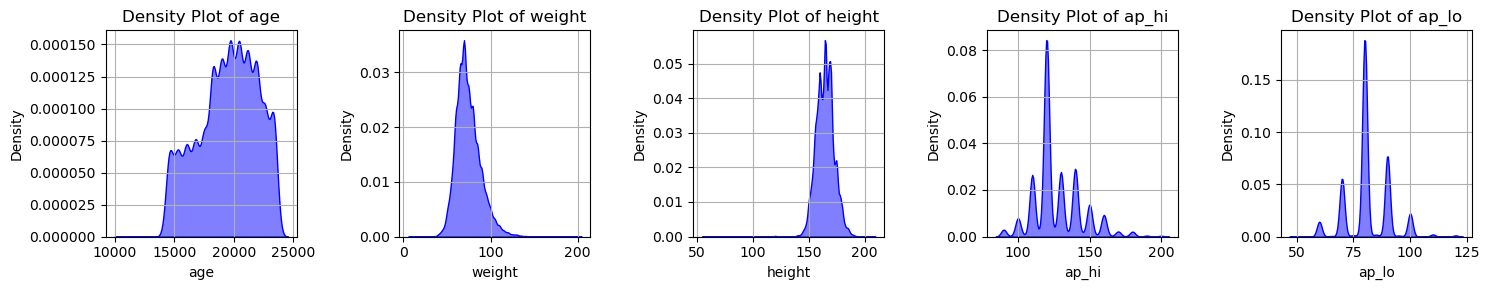

In [28]:
#Visualization after applying plausible filters

fig, axes = plt.subplots(1, len(numerical_cols), figsize=(3*len(numerical_cols), 3))
# Plot density
for i, col in enumerate(numerical_cols):
    sns.kdeplot(
        data=df_plausible, 
        x=col, 
        fill=True, 
        alpha=0.5, 
        color='blue', 
        ax=axes[i]
    )
    axes[i].set_title(f'Density Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [29]:
#Have a look at the data with plausible data values
print(df_plausible.describe()) 
print(df_plausible.head(5))

                age        height        weight         ap_hi         ap_lo  \
count  49643.000000  53210.000000  70000.000000  56975.000000  49773.000000   
mean   19468.172351    164.368389     74.205690    127.005915     81.323750   
std     2466.608531      8.201434     14.395757     16.738310      9.309221   
min    10798.000000     57.000000     10.000000     90.000000     50.000000   
25%    17674.000000    159.000000     65.000000    120.000000     80.000000   
50%    19698.000000    165.000000     72.000000    120.000000     80.000000   
75%    21321.000000    170.000000     82.000000    140.000000     90.000000   
max    23701.000000    207.000000    200.000000    200.000000    120.000000   

       age_z      weight_z  height_z  ap_hi_z  ap_lo_z  
count    0.0  7.000000e+04       0.0      0.0      0.0  
mean     NaN -2.905105e-16       NaN      NaN      NaN  
std      NaN  1.000007e+00       NaN      NaN      NaN  
min      NaN -4.460075e+00       NaN      NaN      NaN  
25%

In [30]:
# Identify rows with any outlier
outlier_cols = [f'{col}_outlier' for col in numerical_cols]
rows_to_drop = df_plausible[outlier_cols].any(axis=1) #these are outliers

# Drop those rows
df_inline_plausible = df_plausible[~rows_to_drop].copy() #~:drop rows_to_drop from the data of df_plausible 

# Confirm the result
print("Remaining rows after dropping all outliers:", df_inline_plausible.shape[0])

Remaining rows after dropping all outliers: 68710


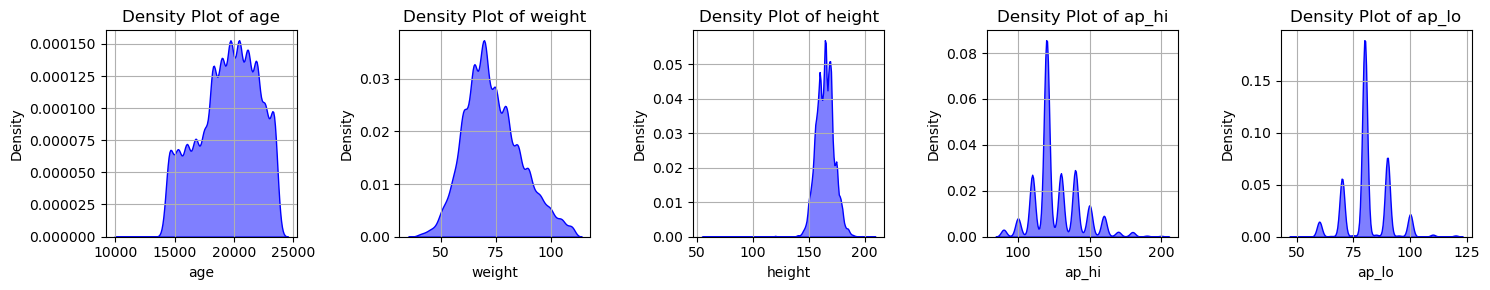

In [31]:
#Visualize all features again...

fig, axes = plt.subplots(1, len(numerical_cols), figsize=(3*len(numerical_cols), 3))
# Plot histograms
for i, col in enumerate(numerical_cols):
    sns.kdeplot(
        data=df_inline_plausible, 
        x=col, 
        fill=True, 
        alpha=0.5, 
        color='blue', 
        ax=axes[i]
    )
    axes[i].set_title(f'Density Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [32]:
#Just get what we need, drop the columns used for scaling and outliers
# Drop all columns that were created for scaling and outlier marking
cols_to_drop = [col for col in df_inline_plausible.columns if col.endswith('_z') or col.endswith('_outlier')]

# Drop them from the DataFrame
df_inline_plausible = df_inline_plausible.drop(columns=cols_to_drop)

# Confirm result
print("Dropped columns:", cols_to_drop)

Dropped columns: ['age_z', 'age_outlier', 'weight_z', 'weight_outlier', 'height_z', 'height_outlier', 'ap_hi_z', 'ap_hi_outlier', 'ap_lo_z', 'ap_lo_outlier']


## 3.2 Handling missing values

Missing data can significantly impact the reliability and performance of machine learning models. Therefore, it is crucial to apply a thoughtful and systematic approach to address this issue. In our preprocessing workflow, we use a two-step strategy:

- Step 1: Remove Rows and Columns with >30% Missingness
We first eliminated all rows and columns that contained more than 30% missing values. This threshold helps reduce the risk of noise and unreliable patterns that may be introduced by excessive missingness. Features with large proportions of missing data often carry little predictive value and can degrade both model performance and interpretability.

- Step 2: Split the data
We will split our data into training data (80%) and test data (20%) and keep the class ration of target variable (cardio).

- Step 3: Imputation Using MICE
For the remaining missing values, we employed Multiple Imputation by Chained Equations (MICE) as mentioned and explained above.We will use Multiple Imputation by Chained Equations (MICE) because our dataset contains both numerical and categorical features and the missing data is assumed to be Missing at Random (MAR). MICE treats each variable with missing values as a dependent variable, predicting it using the other features iteratively. With a LightGBM backend, it provides fast, GPU-accelerated imputations, handles categorical variables, and achieves high predictive accuracy, making it well-suited for preparing reliable data for our classification models. This method models each feature with missing values as a function of other features, iteratively imputing missing entries. Compared to simpler methods (e.g., mean or median imputation), MICE better captures the relationships in the data, producing more accurate and realistic estimates.

##### Impact of Missing Value Handling on Selected Models
1. Logistic Regression is sensitive to missing values and cannot process them directly. Moreover, it assumes linear relationships between predictors and the log-odds of the target. Imputing missing data using MICE allows for preserving these relationships and avoids distortions that could be caused by simplistic methods (like filling with the mean). Proper imputation helps maintain coefficient stability and supports model convergence during optimization.

2. Naive Bayes requires complete data to estimate probability distributions accurately. Missing values can compromise these estimates, especially since the model assumes conditional independence. MICE helps by providing realistic imputations that align with the multivariate structure of the data, thereby supporting more reliable likelihood calculations and improved classification performance.

3. Random Forest is relatively robust to outliers and noisy features, but it cannot handle missing values natively in many implementations (e.g., scikit-learn). Imputing missing values ensures the model can be trained and evaluated without errors. Furthermore, imputing using MICE improves the quality of split decisions in trees by preserving meaningful data patterns, thus enhancing predictive performance and model interpretability.



### Step 1: Remove Rows and Columns with >30% Missingness

In [33]:
df_inline_plausible.isna().sum()

age            19959
gender           697
height         16471
weight             0
ap_hi          12786
ap_lo          19813
cholesterol    12873
gluc            6209
smoke          19599
alco           13090
active          9469
cardio             0
dtype: int64

In [34]:
#copy the data first
df_na_row = df_inline_plausible.copy()

In [35]:
#remove the rows with more than 30% NA cells. There are no columns with missingness rates higher than 30%, so all columns are kept except for "id", which was already removed at the beginning.
missing_row_pct = df_na_row.isna().mean(axis=1)
rows_over_30pct_na = missing_row_pct[missing_row_pct > 0.30].index.tolist()
len(rows_over_30pct_na) # number of to-be removed rows

6763

In [36]:
#now drop those rows
df_na = df_na_row.drop(index=rows_over_30pct_na)

In [37]:
df_na.dtypes

age             float64
gender         category
height          float64
weight          float64
ap_hi           float64
ap_lo           float64
cholesterol    category
gluc           category
smoke          category
alco           category
active         category
cardio         category
dtype: object

### Step 2: Split the data
so that the ratio of classes remains the same in target, we will stratefy in target variable

80% will be training set and the other 20% will be test set


In [38]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(
    df_na,
    test_size=0.2,
    random_state=42,
    stratify=df_na["cardio"]
)

### Let's have a look at our train and test data.

#### Let's see the proportion of the categories in each categorical feature variables in training data....

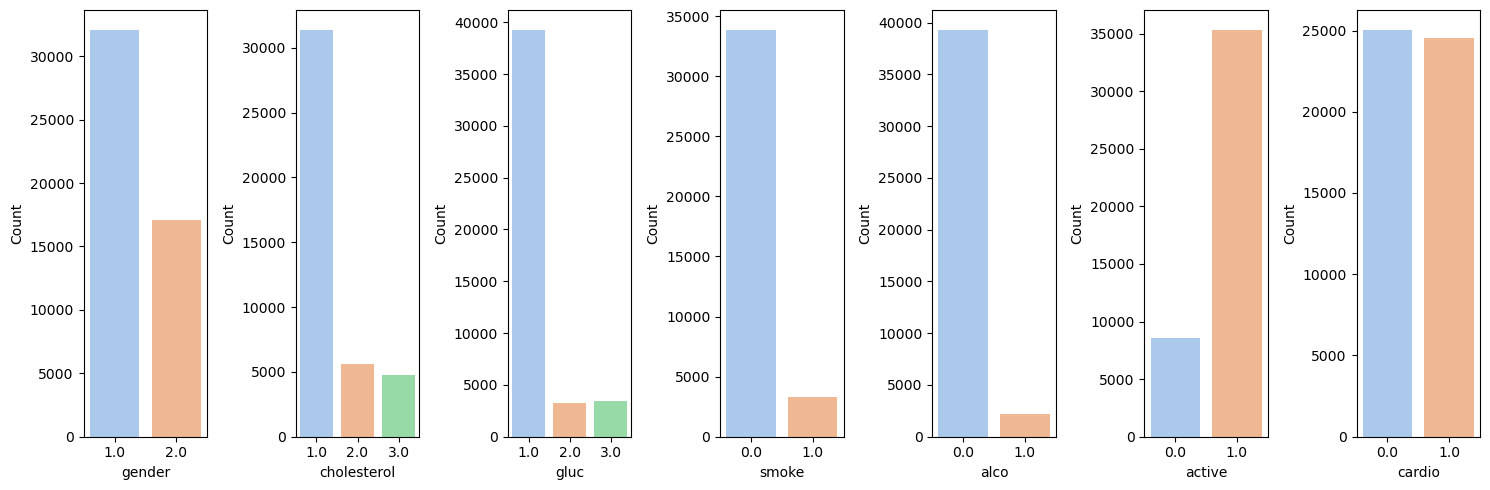

In [39]:
# Create subplots
fig, axes = plt.subplots(1, len(binary_cols), figsize=(15, 5))

# Generate a count plot for each column
for i, col in enumerate(binary_cols):
    sns.countplot(x=col, data=train_df,palette='pastel', ax=axes[i])
    #axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

####  ...and in test data

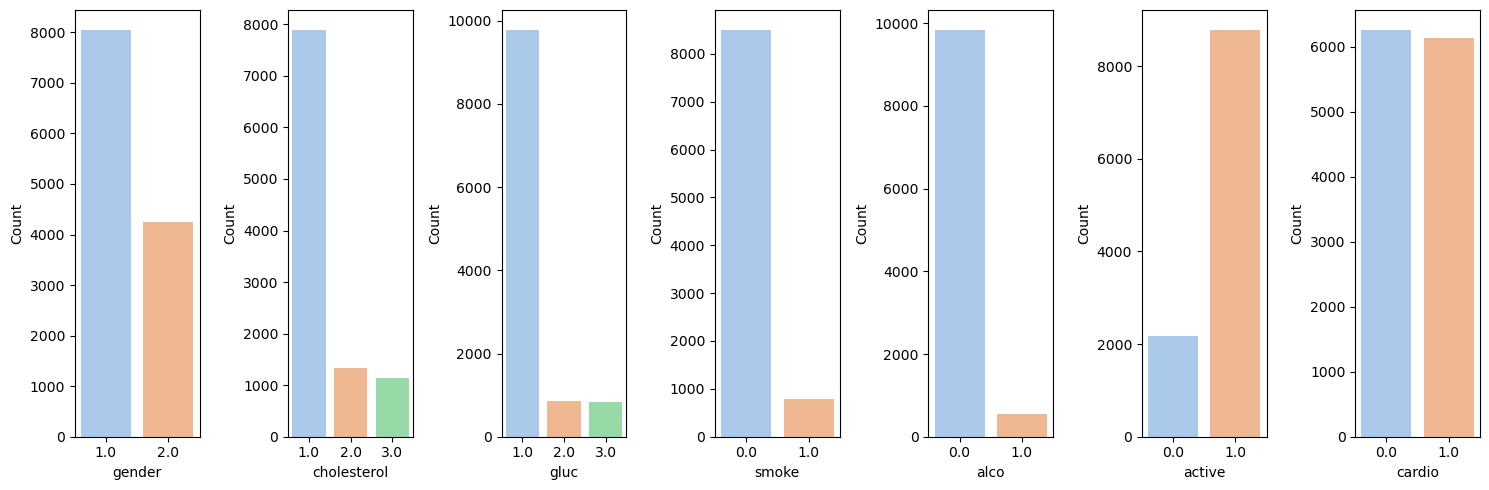

In [40]:
# Create subplots
fig, axes = plt.subplots(1, len(binary_cols), figsize=(15, 5))

# Generate a count plot for each column
for i, col in enumerate(binary_cols):
    sns.countplot(x=col, data=test_df, palette='pastel', ax=axes[i])
    #axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [41]:
#The miceforest library (as of v6.x) requires the DataFrame index to be a RangeIndex, i.e., a simple 0-based sequential integer index.
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

##### Both train and test data should have same types for each column within it

In [42]:
train_df.dtypes

age             float64
gender         category
height          float64
weight          float64
ap_hi           float64
ap_lo           float64
cholesterol    category
gluc           category
smoke          category
alco           category
active         category
cardio         category
dtype: object

In [43]:
test_df.dtypes

age             float64
gender         category
height          float64
weight          float64
ap_hi           float64
ap_lo           float64
cholesterol    category
gluc           category
smoke          category
alco           category
active         category
cardio         category
dtype: object

#### Let's have a blick into the training...

In [44]:
train_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,NaN,1.0,160.0,80.0,NaN,80.0,NaN,2.0,0.0,0.0,1.0,1.0
1,NaN,1.0,159.0,59.0,NaN,80.0,1.0,1.0,NaN,0.0,0.0,0.0
2,18184.0,2.0,NaN,80.7,NaN,95.0,2.0,1.0,0.0,0.0,1.0,0.0
3,23327.0,1.0,151.0,75.0,120.0,70.0,NaN,1.0,NaN,NaN,1.0,1.0
4,20638.0,1.0,168.0,85.0,120.0,80.0,NaN,2.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49552,19657.0,1.0,163.0,65.0,120.0,NaN,1.0,1.0,0.0,NaN,1.0,0.0
49553,21632.0,1.0,166.0,105.0,140.0,90.0,1.0,1.0,0.0,0.0,1.0,1.0
49554,15932.0,2.0,165.0,70.0,150.0,80.0,2.0,1.0,0.0,0.0,1.0,0.0
49555,19834.0,2.0,NaN,63.0,120.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0


#### ...and the test data

In [45]:
test_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,19651.0,1.0,169.0,78.0,120.0,80.0,1.0,NaN,1.0,0.0,1.0,1.0
1,22681.0,2.0,NaN,69.0,140.0,90.0,NaN,1.0,0.0,0.0,NaN,1.0
2,16881.0,1.0,163.0,85.0,120.0,NaN,NaN,1.0,0.0,NaN,1.0,0.0
3,23293.0,1.0,153.0,98.0,170.0,NaN,2.0,3.0,0.0,0.0,1.0,1.0
4,NaN,1.0,169.0,62.0,140.0,90.0,1.0,NaN,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12385,NaN,2.0,172.0,70.0,160.0,NaN,1.0,1.0,0.0,0.0,1.0,1.0
12386,15145.0,2.0,165.0,53.0,NaN,100.0,2.0,1.0,1.0,0.0,1.0,1.0
12387,18856.0,1.0,164.0,95.0,120.0,90.0,1.0,NaN,NaN,0.0,1.0,0.0
12388,16210.0,1.0,160.0,63.0,140.0,100.0,1.0,1.0,0.0,NaN,NaN,1.0


##### Now let's treat the missing values! Yay!


### Step 3: Imputation Using MICE

In [46]:
#we get the feature variables only to fit the kernel, target variable stays out.
train_df_features=train_df.iloc[:,:-1] 
test_df_features=test_df.iloc[:,:-1] 

In [47]:
import miceforest
print(miceforest.__version__)


6.0.3


In [48]:
# Create kernel.
kds = mf.ImputationKernel(train_df_features, random_state=100)
# Run the MICE algorithm for 10 iterations
kds.mice(10)
# Return the completed dataset.
train_df_features_imputed = kds.complete_data()
train_df_features_imputed.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,19448.0,1.0,160.0,80.0,120.0,80.0,1.0,2.0,0.0,0.0,1.0
1,22466.0,1.0,159.0,59.0,120.0,80.0,1.0,1.0,0.0,0.0,0.0
2,18184.0,2.0,173.0,80.7,140.0,95.0,2.0,1.0,0.0,0.0,1.0
3,23327.0,1.0,151.0,75.0,120.0,70.0,1.0,1.0,0.0,0.0,1.0
4,20638.0,1.0,168.0,85.0,120.0,80.0,1.0,2.0,0.0,0.0,0.0
5,21907.0,1.0,168.0,78.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0
6,22118.0,2.0,173.0,60.5,130.0,80.0,1.0,1.0,1.0,0.0,1.0
7,21848.0,1.0,161.0,73.0,130.0,90.0,2.0,1.0,0.0,0.0,1.0
8,15769.0,1.0,158.0,60.0,110.0,60.0,1.0,1.0,0.0,0.0,1.0
9,18222.0,1.0,175.0,60.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0


#### now let's bring this imputation to the test set

In [49]:
imputed_test = kds.impute_new_data(test_df_features, iterations=10)
test_df_features_imputed = imputed_test.complete_data()

### Let's finalise the training and test dataset by bringing the target variable column cardio back ###

In [50]:
# Create a copy of the imputed feature dataframe
final_train_df = train_df_features_imputed.copy()

# Assign the 'cardio' column from the original train_df (target column)
final_train_df["cardio"] = train_df["cardio"].values

# Display the first 5 rows
final_train_df.head(5)
#Now final_train_df has both X_train and Y_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,19448.0,1.0,160.0,80.0,120.0,80.0,1.0,2.0,0.0,0.0,1.0,1.0
1,22466.0,1.0,159.0,59.0,120.0,80.0,1.0,1.0,0.0,0.0,0.0,0.0
2,18184.0,2.0,173.0,80.7,140.0,95.0,2.0,1.0,0.0,0.0,1.0,0.0
3,23327.0,1.0,151.0,75.0,120.0,70.0,1.0,1.0,0.0,0.0,1.0,1.0
4,20638.0,1.0,168.0,85.0,120.0,80.0,1.0,2.0,0.0,0.0,0.0,0.0


In [51]:
# Create a copy of the imputed feature dataframe
final_test_df = test_df_features_imputed.copy()

# Assign the 'cardio' column from the original train_df (target column)
final_test_df["cardio"] = test_df["cardio"].values

# Display the first 5 rows
final_test_df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,19651.0,1.0,169.0,78.0,120.0,80.0,1.0,2.0,1.0,0.0,1.0,1.0
1,22681.0,2.0,153.0,69.0,140.0,90.0,1.0,1.0,0.0,0.0,1.0,1.0
2,16881.0,1.0,163.0,85.0,120.0,90.0,1.0,1.0,0.0,0.0,1.0,0.0
3,23293.0,1.0,153.0,98.0,170.0,90.0,2.0,3.0,0.0,0.0,1.0,1.0
4,22771.0,1.0,169.0,62.0,140.0,90.0,1.0,1.0,0.0,0.0,1.0,0.0


In [52]:
#after NA is treated, let's rename the training and test set#

In [53]:
train_X =train_df_features_imputed.copy()
train_Y=train_df["cardio"]
test_X=test_df_features_imputed.copy()
test_Y=test_df["cardio"]

## 3.3 Subset selection of feature variables

Wrapper method: Wrapper Method: Recursive Feature Elimination

🔍 We used a wrapper method (Recursive Feature Elimination with Logistic Regression) because it directly evaluates feature subsets based on model performance. Unlike filter methods, RFE treats feature selection as a search problem, iteratively removing the least important features to optimize classification accuracy. This approach captures feature interactions, reduces overfitting, and results in a simpler, more interpretable model suitable for the medical context.

In [54]:
# Initialize RFE and fit to data
# Import libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# Initialize estimator (e.g., Logistic Regression)
estimator = LogisticRegression()

In [55]:
X_wrap= final_train_df.iloc[:, :-1] 
Y_wrap= final_train_df.iloc[:,-1: ]
print(X_wrap.shape)
print(Y_wrap.shape)

(49557, 11)
(49557, 1)


##### Let's encode our catagorical features

In [56]:
#encode categorical features
X_encoded = pd.get_dummies(X_wrap, drop_first=True)
feature_names = X_encoded.columns  # Save this BEFORE scaling

X_encoded.head(5)

,age,height,weight,ap_hi,ap_lo,gender_2.0,cholesterol_2.0,cholesterol_3.0,gluc_2.0,gluc_3.0,smoke_1.0,alco_1.0,active_1.0
0,19448.0,160.0,80.0,120.0,80.0,False,False,False,True,False,False,False,True
1,22466.0,159.0,59.0,120.0,80.0,False,False,False,False,False,False,False,False
2,18184.0,173.0,80.7,140.0,95.0,True,True,False,False,False,False,False,True
3,23327.0,151.0,75.0,120.0,70.0,False,False,False,False,False,False,False,True
4,20638.0,168.0,85.0,120.0,80.0,False,False,False,True,False,False,False,False


##### Let's scale our numeric features

In [57]:
#scale the numeric variables
numerical_cols = ['age', 'weight', 'height', "ap_hi","ap_lo"]


In [58]:
# check the type
X_encoded.dtypes

age                float64
height             float64
weight             float64
ap_hi              float64
ap_lo              float64
gender_2.0            bool
cholesterol_2.0       bool
cholesterol_3.0       bool
gluc_2.0              bool
gluc_3.0              bool
smoke_1.0             bool
alco_1.0              bool
active_1.0            bool
dtype: object

In [59]:
from sklearn.preprocessing import StandardScaler
## Scale numeric features with standard scaling
scaler = StandardScaler()
X_scaled = X_encoded.copy()
scaled_numeric_col = scaler.fit_transform(X_encoded[numerical_cols])
X_scaled[numerical_cols] = scaled_numeric_col
scaled_numeric_col
X_scaled

#target variable is not required to be encoded

,age,height,weight,ap_hi,ap_lo,gender_2.0,cholesterol_2.0,cholesterol_3.0,gluc_2.0,gluc_3.0,smoke_1.0,alco_1.0,active_1.0
0,-0.007069,-0.532314,0.520064,-0.404888,-0.144357,False,False,False,True,False,False,False,True
1,1.215999,-0.656255,-1.126770,-0.404888,-0.144357,False,False,False,False,False,False,False,False
2,-0.519314,1.078914,0.574958,0.807292,1.464464,True,True,False,False,False,False,False,True
3,1.564925,-1.647779,0.127961,-0.404888,-1.216904,False,False,False,False,False,False,False,True
4,0.475188,0.459211,0.912167,-0.404888,-0.144357,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49552,0.077630,-0.160492,-0.656246,-0.404888,-0.144357,False,False,False,False,False,False,False,True
49553,0.878014,0.211329,2.480581,0.807292,0.928191,False,False,False,False,False,False,False,True
49554,-1.431954,0.087389,-0.264143,1.413382,-0.144357,True,True,False,False,False,False,False,True
49555,0.149361,1.698616,-0.813087,-0.404888,-0.144357,True,False,False,False,False,False,False,False


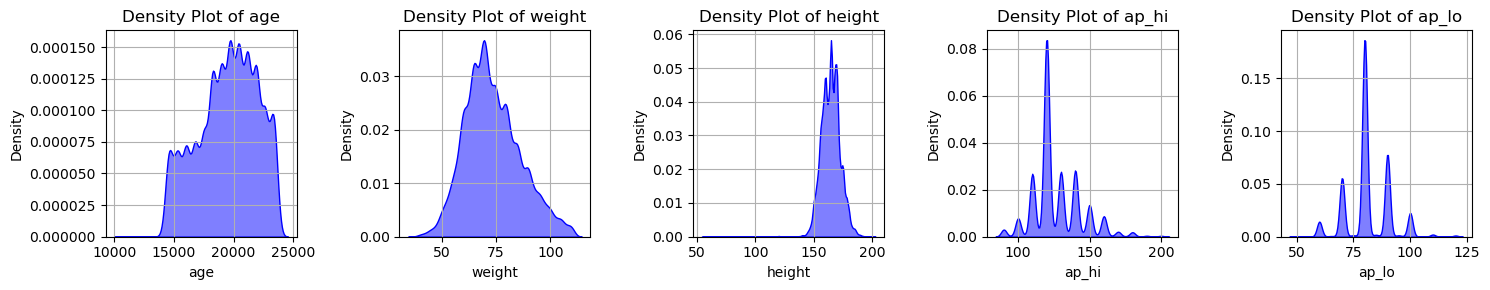

In [60]:
numerical_cols = ['age', 'weight', 'height', "ap_hi","ap_lo"]

fig, axes = plt.subplots(1, len(numerical_cols), figsize=(3*len(numerical_cols), 3))
# Plot histograms
for i, col in enumerate(numerical_cols):
    sns.kdeplot(
        data=X_wrap, 
        x=col, 
        fill=True, 
        alpha=0.5, 
        color='blue', 
        ax=axes[i]
    )
    axes[i].set_title(f'Density Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

### Now let's get our 2 relevant features for further steps

In [61]:
rfe_selector = RFE(estimator, n_features_to_select=2, step=1) #select 3 features, remove 1 feature each iteration)
rfe_selector = rfe_selector.fit(X_scaled, Y_wrap.values.ravel()) #convert Y_warp into an flatt 1D array

In [62]:
# Assume feature_names is a list or array of all feature names
selected_indices = rfe_selector.get_support(indices=True)
selected_feature_names = [feature_names[i] for i in selected_indices]
print("Selected Features:", selected_feature_names)




Selected Features: ['ap_hi', 'cholesterol_3.0']


### 🧭 So we will take ap_hi (systolic blood pressure) and cholesterol level and build models with these 2 features.

# 4. Model selection


For predicting cardiovascular risk (cardio) in a large binary classification dataset, we selected Logistic Regression (baseline), Categorical Naive Bayes, and Random Forest Classifier. Each model was chosen based on its ability to efficiently handle the dataset size, task requirements, and computational demands.

Logistic Regression (Baseline)

- Naturally suited for binary classification problems.

- Computationally light, even with a large dataset, due to its linear structure and efficient solvers.

- Provides interpretable coefficients and probability estimates, making it ideal as a baseline model to benchmark against more complex algorithms.

Categorical Naive Bayes

- Handles categorical and binned variables (like cholesterol and glucose) directly without heavy preprocessing.

- Extremely fast and memory-efficient, scaling well to large datasets.

- Although it assumes feature independence, its speed and simplicity make it a strong lightweight model for comparison.

Random Forest Classifier

- Designed for classification tasks with mixed feature types (numeric and categorical).

- Can handle large datasets effectively by parallelizing tree construction and prediction.

- While more computationally intensive than Logistic Regression or Naive Bayes, hyperparameter tuning (via RandomizedSearchCV) allows controlling complexity, keeping it manageable while leveraging its strong predictive power.

We excluded Support Vector Machines (SVM) because they are computationally heavy on large datasets, especially with cross-validation and kernel methods. Similarly, K-Nearest Neighbors (KNN) was not used as it is a “lazy learner” that scales poorly with large datasets, offering little interpretability or efficiency compared to the chosen models.

### Choice of evaluation metric 

We used accuracy and recall as our main evaluation metrics. Accuracy reflects the model’s overall ability to correctly classify both healthy and diseased patients, giving a clear picture of general performance. However, because missing a cardiovascular disease case (false negative) can have serious medical consequences, recall for the positive class is particularly important. High recall ensures that most patients with the disease are correctly identified, even if this means accepting more false positives.

# 5A. Model training

## Model 1: Logistic Regression



🔎 We began with Logistic Regression because it is one of the simplest yet most versatile algorithms for classification tasks, making it a natural starting point for predicting cardiovascular disease. 

Logistic Regression works well when its key assumptions are met, and in our case, they largely are. 

Our target variable is binary, and the observations are independent (no repeated measurements). 

The features show little multicollinearity—for example, the correlation between systolic blood pressure (ap_hi) and cholesterol is only 0.03, which is negligible. 

While Logistic Regression assumes a linear relationship between the features and the log-odds of the target, it is robust enough to handle slight deviations, especially with proper scaling. 

Finally, the algorithm performs best with large datasets, which we have, ensuring stable and reliable estimates. It was fast to train and predict, with no computational trade-offs during hyperparameter tuning or cross-validation, making it efficient for large-scale or real-time applications.

🔎 Because of its simplicity, interpretability, and compatibility with our dataset, Logistic Regression serves as a baseline model for comparison with more complex approaches later. 


### Let's start with preprocessing our subset of data

There are several distinct peaks (e.g., around 110, 120, 130, 140 mmHg), suggesting the data may have been recorded in rounded increments.
The distribution is skewed to the right (longer tail toward higher values, up to ~200 mmHg), indicating the presence of individuals with elevated blood pressure (hypertension).


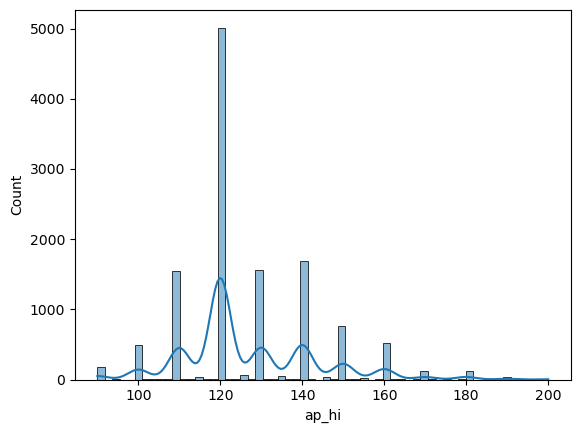

In [63]:
X_train_binaryLR = final_train_df.loc[:, ["ap_hi","cholesterol"]] 
y_train_binaryLR= final_train_df.loc[:,"cardio"]
X_test_binaryLR = final_test_df.loc[:, ["ap_hi","cholesterol"]]
y_test_binaryLR = final_test_df.loc[:, ["cardio"]]

sns.histplot(data=X_test_binaryLR, x='ap_hi', bins=60, kde=True)
print("There are several distinct peaks (e.g., around 110, 120, 130, 140 mmHg), "
      "suggesting the data may have been recorded in rounded increments.\n"
      "The distribution is skewed to the right (longer tail toward higher values, "
      "up to ~200 mmHg), indicating the presence of individuals with elevated blood pressure (hypertension)."
     )

🤔 Logistic Regression is sensitive to outliers because extreme values can heavily influence the estimated coefficients and shift the decision boundary. In our dataset, extremely high values on the right values of systolic blood pressure (ap_hi) could slightly impact model stability. So we first scaled this feature with RobustScaler() to minimize the influence of extreme values.

### Scaling numeric feature and Encoding categorical feature

These higher values are not statistical outliers
but reflect true variability in the sample,
as extreme/unrealistic entries were already removed
and missing values handled.
We decided therefore to use RobustScaler
to handle the ap_hi feature.


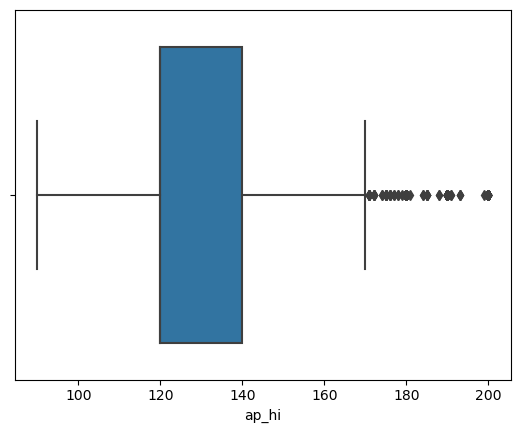

In [64]:
sns.boxplot(x=X_train_binaryLR['ap_hi']) 
print("""These higher values are not statistical outliers
but reflect true variability in the sample,
as extreme/unrealistic entries were already removed
and missing values handled.
We decided therefore to use RobustScaler
to handle the ap_hi feature.""")

## scale feature variables in train and test data
from sklearn.preprocessing import StandardScaler, RobustScaler, OrdinalEncoder
scaler2 = StandardScaler()
scaler = RobustScaler()

X_train_binaryLR['ap_hi_scaled'] = scaler.fit_transform(X_train_binaryLR[['ap_hi']])
X_train_binaryLR['ap_hi_scaled2'] = scaler2.fit_transform(X_train_binaryLR[['ap_hi']])

X_test_binaryLR['ap_hi_scaled'] = scaler.transform(X_test_binaryLR[['ap_hi']])

##encode cholesterol levels
encoder = OrdinalEncoder(categories=[[1, 2, 3]]) #because cholesterol level is ordinal variable, so we use OrdinalEncoder to encode this feature
X_train_binaryLR['cholesterol_encoded'] = encoder.fit_transform(X_train_binaryLR[['cholesterol']])
X_test_binaryLR['cholesterol_encoded'] = encoder.transform(X_test_binaryLR[['cholesterol']])

# Keep only the processed columns
X_train_binaryLR_scaled = X_train_binaryLR[['ap_hi_scaled', 'cholesterol_encoded']]
X_test_binaryLR_scaled = X_test_binaryLR[['ap_hi_scaled', 'cholesterol_encoded']]

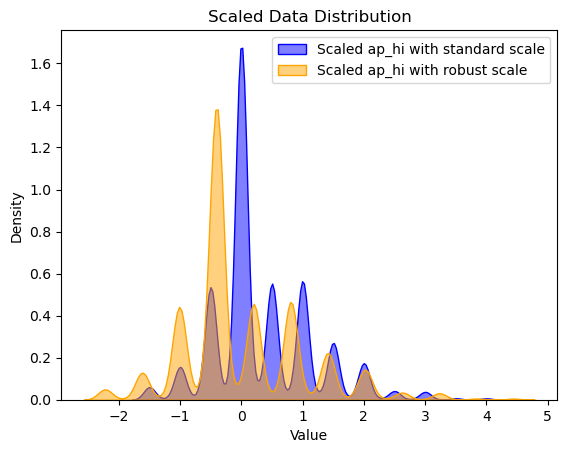

standard scaling did not improve the distribution in this feature. so we decided to choose robustscaler to scale ap_hi


In [65]:
# Plot scaled data line plots
sns.kdeplot(X_train_binaryLR['ap_hi_scaled'], color='blue', label='Scaled ap_hi with standard scale', fill=True, alpha=0.5)
sns.kdeplot(X_train_binaryLR['ap_hi_scaled2'], color='orange', label='Scaled ap_hi with robust scale', fill=True, alpha=0.5)
plt.title('Scaled Data Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

print("standard scaling did not improve the distribution in this feature. so we decided to choose robustscaler to scale ap_hi")

### Let's first go through our parameter choices in hyperparameter tuning for our logistic regression model
- C: np.logspace(-3, 3, 8)

This controls the regularization strength in Logistic Regression. It’s the inverse of the penalty (λ), so smaller values of C mean stronger regularization (simpler models, less risk of overfitting), while larger values allow the model to fit the data more closely.
By testing values from 10⁻³ to 10³ across 8 points, we explore models ranging from very constrained (highly regularized) to very flexible.

- penalty: ['l2', 'l1']

These specify the type of regularization:

l2 (Ridge): Shrinks coefficients smoothly, keeping all features but reducing their influence.

l1 (Lasso): Can shrink some coefficients to zero, effectively performing feature selection.

We skip elastic net for speed, focusing on these two most common penalties.

- solver: ['sag', 'saga']

Both solvers are designed to handle large datasets efficiently:
We used the SAG and SAGA solvers because they are designed for large datasets. SAG updates model parameters using the average gradient across all samples, offering speed but sometimes requiring more iterations to converge. SAGA extends SAG by adding a correction term for faster convergence and supports both l1 and l2 penalties, making it more flexible. These solvers balance speed, scalability, and regularization options, which suits our cardiovascular dataset.

- max_iter: [100, 200, 500]

Sets the maximum number of iterations for the solver to converge. Logistic Regression may need more iterations, especially with regularization and many features, so we test multiple values to prevent convergence warnings and ensure stable solutions.

### That's it. Now we will... 🐾🐾🐾

- do grid search
- build up the model with results from the grid search 
- have a look at the accuracy at the end

In [66]:
#load what we need
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Define the hyperparameter grid
param_grid = {
    'C': np.logspace(-3, 3, 8),          # Fewer points (1e-3 to 1e3)
    'penalty': ['l2', 'l1'],             # Skip elasticnet for speed
    'solver': ['saga'],                  # Handles large datasets efficiently
    'max_iter': [100,200,500]                    # More iterations for convergence
}

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1
)

grid_search.fit(X_train_binaryLR_scaled, y_train_binaryLR) 
# Use scaled features

# Best model and parameters
best_lg_model = grid_search.best_estimator_
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)

# Predictions on the test set
y_pred_lg = best_lg_model.predict(X_test_binaryLR_scaled)

# Evaluation
print("\nClassification Report on Test Set with threshold 0.5:")
print(classification_report(y_test_binaryLR, y_pred_lg)) 

from sklearn.metrics import accuracy_score
# Predictions for train and test sets
y_pred_train_lg = best_lg_model.predict(X_train_binaryLR_scaled)
y_pred_test_lg = best_lg_model.predict(X_test_binaryLR_scaled)

# Accuracy scores
train_accuracy_lg = accuracy_score(y_train_binaryLR, y_pred_train_lg)
test_accuracy_lg = accuracy_score(y_test_binaryLR, y_pred_test_lg)

print(f"Training Accuracy of Logistic Regression: {train_accuracy_lg:.3f}")
print(f"Test Accuracy of Logistic Regression: {test_accuracy_lg:.3f}")

Best parameters found: {'C': 0.0071968567300115215, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validated score: 0.7073470228862543

Classification Report on Test Set with threshold 0.5:
              precision    recall  f1-score   support

         0.0       0.67      0.75      0.71      6253
         1.0       0.71      0.62      0.66      6137

    accuracy                           0.69     12390
   macro avg       0.69      0.69      0.69     12390
weighted avg       0.69      0.69      0.69     12390

Training Accuracy of Logistic Regression: 0.707
Test Accuracy of Logistic Regression: 0.688


### Look! 🧐🧐🧐
Our Logistic Regression model achieved with a threshold of 0.5 a training accuracy of 0.707 and a test accuracy of 0.688. The small gap between training and test performance suggests that the model is not overfitting and generalizes reasonably well to unseen data. However, the recall score is 0.62 with threshold of 0.5.  

⇒ We will try to lower the threshold to 0.4 to catch more positive cases. 

In [67]:
# Predict probabilities for train and test sets
y_train_probs = best_lg_model.predict_proba(X_train_binaryLR_scaled)[:, 1]
y_test_probs = best_lg_model.predict_proba(X_test_binaryLR_scaled)[:, 1]

# Apply the threshold
threshold = 0.4
y_train_pred_thresh = (y_train_probs >= threshold).astype(int)
y_test_pred_thresh = (y_test_probs >= threshold).astype(int)

# Calculate accuracy for both sets
train_acc_thresh = accuracy_score(y_train_binaryLR, y_train_pred_thresh)
test_acc_thresh = accuracy_score(y_test_binaryLR, y_test_pred_thresh)

print(f"Training Accuracy (Threshold = {threshold}): {train_acc_thresh:.3f}")
print(f"Test Accuracy (Threshold = {threshold}): {test_acc_thresh:.3f}")
print("\nClassification Report on Test Set with threshold 0.4:")
print(classification_report(y_test_binaryLR, y_test_pred_thresh)) 

Training Accuracy (Threshold = 0.4): 0.701
Test Accuracy (Threshold = 0.4): 0.682

Classification Report on Test Set with threshold 0.4:
              precision    recall  f1-score   support

         0.0       0.68      0.69      0.69      6253
         1.0       0.68      0.68      0.68      6137

    accuracy                           0.68     12390
   macro avg       0.68      0.68      0.68     12390
weighted avg       0.68      0.68      0.68     12390



With the threshold 0.4, our training and test accuracy is 0.70 and 0.68 respectively. The recall of test data rises from 0.62 to 0.68. So will now take the 0.4 as threshold.

#### We will now look at the confusion matrix in both cases:

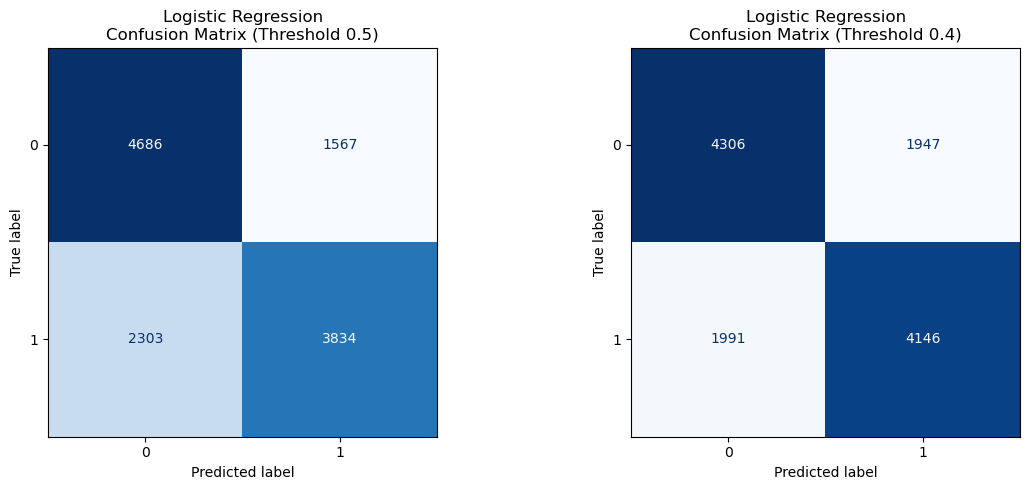

In [68]:
# Get predicted probabilities for class 1 (cardiovascular disease)
y_probs_lg = best_lg_model.predict_proba(X_test_binaryLR_scaled)[:, 1]

# Predictions for default threshold 0.5
y_pred_05 = best_lg_model.predict(X_test_binaryLR_scaled)
cm_05 = confusion_matrix(y_test_binaryLR, y_pred_05)

# Predictions for custom threshold 0.4
threshold = 0.4
y_pred_04 = (y_probs_lg >= threshold).astype(int)
cm_04 = confusion_matrix(y_test_binaryLR, y_pred_04)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix for threshold 0.5
disp_05 = ConfusionMatrixDisplay(confusion_matrix=cm_05)
disp_05.plot(cmap='Blues', values_format='d', ax=axes[0], colorbar=False)
axes[0].set_title("Logistic Regression\nConfusion Matrix (Threshold 0.5)")
axes[0].grid(False)

# Plot confusion matrix for threshold 0.4
disp_04 = ConfusionMatrixDisplay(confusion_matrix=cm_04)
disp_04.plot(cmap='Blues', values_format='d', ax=axes[1], colorbar=False)
axes[1].set_title("Logistic Regression\nConfusion Matrix (Threshold 0.4)")
axes[1].grid(False)

# Adjust layout
plt.tight_layout()
plt.show()


The AUC is: 0.725 (moderate discriminatory ability)


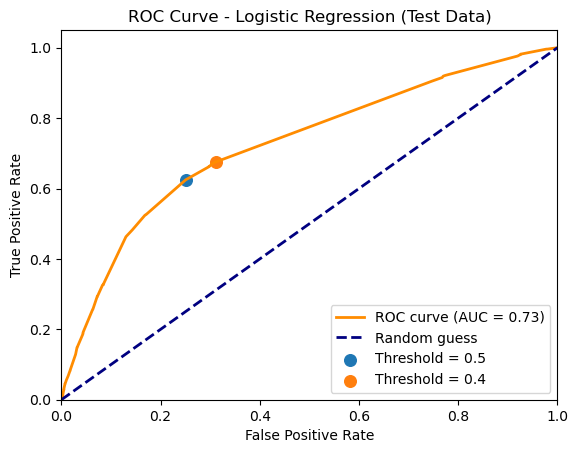

In [69]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for class 1
y_probs_lg = best_lg_model.predict_proba(X_test_binaryLR_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binaryLR, y_probs_lg)
roc_auc_lg = auc(fpr, tpr)
print(f"The AUC is: {roc_auc_lg:.3f} (moderate discriminatory ability)")

# Find the closest points for thresholds 0.5 and 0.4
thresholds_to_mark = [0.5, 0.4]
points = []
for th in thresholds_to_mark:
    idx = np.argmin(np.abs(thresholds - th))
    points.append((fpr[idx], tpr[idx], th))

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc_lg:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random guess")

# Mark the selected thresholds
for (fp, tp, th) in points:
    plt.scatter(fp, tp, label=f"Threshold = {th}", s=70)

# Plot details
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("ROC Curve - Logistic Regression (Test Data)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


📝 By lowering the decision threshold to 0.4, the model’s recall for cardiovascular disease cases improves from 0.62 to 0.68, detecting about 6% more true positives compared to the default 0.5 cut-off. While this adjustment also raises the false positive rate by roughly 6%, the trade-off is acceptable in a medical context where catching more patients at risk outweighs the cost of additional follow-ups for healthy individuals. Therefore, we adopt the 0.4 threshold to prioritize sensitivity for disease detection.

# Model 2: Naive Bayes

We used Naive Bayes because it is a simple and fast model that is easy to understand. It assumes the features are independent given the class label, which fits our dataset because the features have very low correlation (e.g., ap_hi and cholesterol, r = 0.03). This makes it straightforward to explain which factors drive predictions.

Naive Bayes is also robust to outliers, since each feature is treated separately. By discretizing ap_hi into three bins (low, medium, high), we reduced the effect of extreme blood pressure values even more.

The model showed stable accuracy on both training and test sets, with no signs of overfitting or underfitting. While its accuracy is moderate, it generalizes reliably and allows us to adjust thresholds easily if we want to improve recall for disease detection.

It is also very fast to train and predict, as it only calculates probabilities and has very few parameters (alpha and fit_prior) to tune.

##### 💭💭💭 Because Naive Bayes requires both features to share the same category... 
we have to turn ap_hi from a numeric feature into a categorical one.
We divided the values into 3 bins according to the quantiles.

At the end, we will have a look and see how the three classes of the converted ap_hi (systolic blood pressure) look like.


In [70]:
# Import libraries
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
kbins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

In [71]:
# Fit on train only
X_train_binned = final_train_df.loc[:, ["ap_hi","cholesterol"]]
X_train_binned[['ap_hi']] = kbins.fit_transform(X_train_binned[['ap_hi']])

# Transform test with same bins
X_test_binned = final_test_df.loc[:, ["ap_hi","cholesterol"]]
X_test_binned[['ap_hi']] = kbins.transform(X_test_binned[['ap_hi']])

y_train=y_train_binaryLR.copy()
y_test=y_test_binaryLR.copy()

Counts per bin (class):
Bin 0: 9196 samples
Bin 1: 20357 samples
Bin 2: 20004 samples


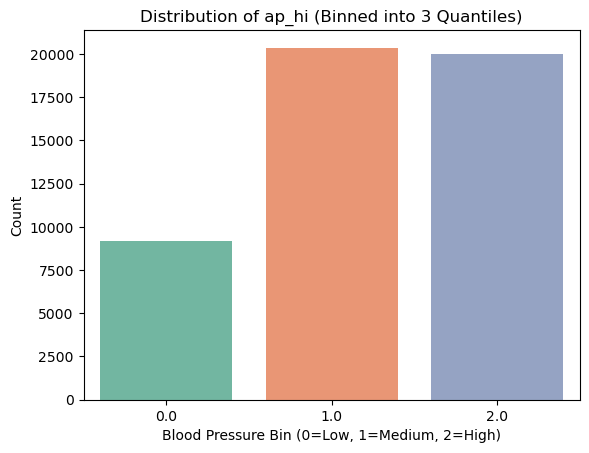

In [72]:
# Flatten ap_hi to 1D array for counting
bp_binned = X_train_binned[['ap_hi']].astype(int).values.ravel()

# Count how many samples in each bin
bin_counts = pd.Series(bp_binned).value_counts().sort_index()

# Print bin counts
print("Counts per bin (class):")
for bin_id, count in bin_counts.items():
    print(f"Bin {bin_id}: {count} samples")

sns.countplot(data=X_train_binned, x='ap_hi', palette="Set2")
plt.title("Distribution of ap_hi (Binned into 3 Quantiles)")
plt.xlabel("Blood Pressure Bin (0=Low, 1=Medium, 2=High)")
plt.ylabel("Count")
plt.show()

### Now we have both our variables as categorical. Let's do hyperparameter tuning for naives bayes 🚀🚀🚀 ###

For Naive Bayes, we tuned two hyperparameters that most influence the model’s performance:

- alpha (Laplace smoothing parameter)

Naive Bayes computes probabilities for each feature given a class. If a particular category or value never appears with a specific class in the training data, the probability becomes zero, which can cause the model to make extreme or invalid predictions. The alpha parameter adds a small constant to every probability estimate to avoid zeros and stabilize the model.

We tested values 0.001, 0.01, 0.1, and 1.0 to cover a range from minimal smoothing (allowing the model to fit closely to the data) to strong smoothing (which is more robust to rare categories and noise).

This range allows us to balance between capturing the true distribution (low alpha) and avoiding overfitting or instability (higher alpha).

- fit_prior (whether to use learned class priors)

This parameter controls whether the model should use the actual class distribution from the training data or assume equal class probabilities.

Using the true priors (fit_prior=True) allows the model to reflect the natural imbalance in our dataset (where healthy cases outnumber disease cases). Setting it to False forces the model to treat both classes equally, which can sometimes improve detection of the minority class (cardiovascular disease) by reducing the dominance of the majority class.

with a balanced target like that in our case, tuning this parameter is mainly a formality — we include it to confirm that the default (True) doesn’t skew results.
By tuning these parameters, we ensure the Naive Bayes model remains stable, avoids zero-probability issues, and adapts to the dataset’s class distribution in a way that maximizes predictive performance.

#### Now let's do the hyperparameter tuning, build the model and get a look at the accuracy

In [73]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tunning
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0],     
    'fit_prior': [True, False]             
}

# Set up grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=CategoricalNB(),
    param_grid=param_grid,
    scoring='accuracy',  # You can also use 'f1_macro', 'roc_auc', etc.
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit the grid search on your training data
grid_search.fit(X_train_binned, y_train)

# Best model
cnb_model = grid_search.best_estimator_
print("Best parameters found:", grid_search.best_params_)

#Fit CatNB on the training data
cnb_model.fit(X_train_binned, y_train)

# Predict and evaluate on test data
y_pred_cnb = cnb_model.predict(X_test_binned)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_cnb))

#  Check for Overfitting
# Calculate accuracy scores
train_accuracy_cnb = cnb_model.score(X_train_binned, y_train)
test_accuracy_cnb = cnb_model.score(X_test_binned, y_test)

# Print them
print(f"Training set accuracy: {train_accuracy_cnb:.3f}")
print(f"Test set accuracy: {test_accuracy_cnb:.3f}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found: {'alpha': 0.001, 'fit_prior': True}

Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0       0.67      0.75      0.71      6253
         1.0       0.71      0.62      0.66      6137

    accuracy                           0.69     12390
   macro avg       0.69      0.69      0.69     12390
weighted avg       0.69      0.69      0.69     12390

Training set accuracy: 0.707
Test set accuracy: 0.688


##### Look! 

The Categorical Naive Bayes model achieved an overall accuracy of 0.69 on the test set. Recall was 0.75 for class 0 (no disease) and 0.62 for class 1 (cardiovascular disease), indicating the model is better at identifying healthy individuals than detecting disease cases. While the accuracy is moderate, the lower recall for the positive class suggests that some cardiovascular cases are missed.

##### Let's see how our confusion matrix looks like 

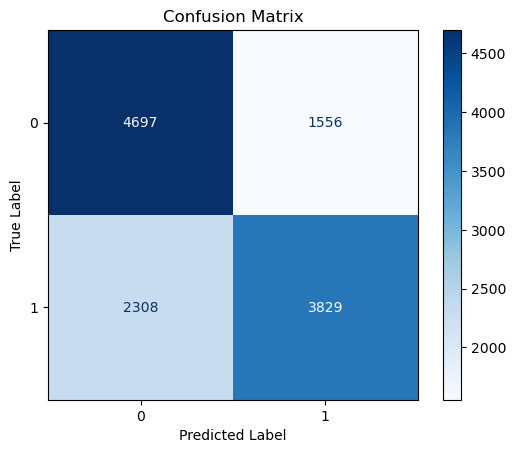

In [74]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_cnb = confusion_matrix(y_test, y_pred_cnb)
cm_display = ConfusionMatrixDisplay(cm_cnb)
cm_display.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.grid(False)
plt.show()

⤷ The Categorical Naive Bayes model correctly classified 4,697 out of 6,253 healthy individuals and 3,829 out of 6,137 cardiovascular disease cases. This translates to a test accuracy of 0.69, with recall of 0.75 for healthy individuals and 0.62 for those with cardiovascular disease. The model is more effective at identifying healthy individuals, but it misses about 38% of true cardiovascular disease cases (2,308 false negatives), suggesting that further tuning or threshold adjustments may be necessary if sensitivity is the priority.

The AUC is: 0.7147257144499596  (moderate discriminatory ability)
The Categorical Naive Bayes model achieved an AUC of 0.715 on the test set, which indicates moderate discriminatory ability in distinguishing between patients with and without cardiovascular disease.


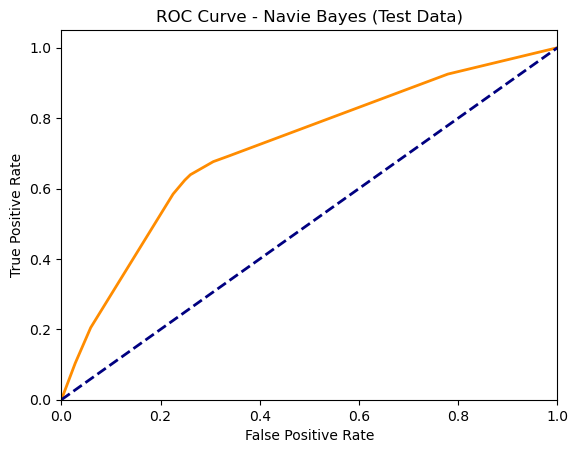

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
# Compute ROC curve and ROC area for each class
y_prob_cnb= cnb_model.predict_proba(X_test_binned)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_cnb)
roc_auc_cnb= roc_auc_score(y_test, y_prob_cnb)

# Calculate AUC
print("The AUC is:", roc_auc_cnb, " (moderate discriminatory ability)")
print("The Categorical Naive Bayes model achieved an AUC of 0.715 on the test set, "
      "which indicates moderate discriminatory ability in distinguishing between "
      "patients with and without cardiovascular disease.")

 # Plotting the ROC curve
# Plot AUC!!!
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("ROC Curve - Navie Bayes (Test Data)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


# Model 3: Random Forest

🌲Why Random Forest?
We chose Random Forest because it is an ensemble of many decision trees, which improves accuracy and reduces overfitting compared to a single tree. It can handle both categorical (like cholesterol, encoded ordinally) and numerical features without scaling, making it easy to apply to our dataset. By averaging results across trees, it is also robust to outliers and noise.

Although each tree is easy to understand, the whole ensemble is less transparent for stakeholders. The model generalizes well thanks to parameter tuning (limiting tree depth and splits) and captures non-linear relationships that simpler models might miss. While training takes longer than Logistic Regression or Naive Bayes, it remains practical with parallelization, and prediction is fast once trained.

#### We will start with getting us the two relevant features and encode our categorical one

In [76]:
X_test = final_test_df.loc[:, ["ap_hi","cholesterol"]]
y_test = final_test_df["cardio"]
X_train = final_train_df.loc[:, ["ap_hi","cholesterol"]]
y_train = final_train_df["cardio"]
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (49557, 2)
Shape of X_test: (12390, 2)
Shape of y_train: (49557,)
Shape of y_test: (12390,)


In [77]:
##encode cholesterol levels
encoder = OrdinalEncoder(categories=[[1, 2, 3]]) #because cholesterol level is ordinal variable, so we use OrdinalEncoder to encode this feature
X_train['cholesterol_encoded'] = encoder.fit_transform(X_train[['cholesterol']])
X_test['cholesterol_encoded'] = encoder.transform(X_test[['cholesterol']])
# Keep only the processed columns
X_train_rf = X_train_binaryLR[['ap_hi', 'cholesterol_encoded']]
X_test_rf = X_test_binaryLR[['ap_hi', 'cholesterol_encoded']]


### Hyperparameter tuning for random forest
For our parameter tuning, we took into consideration that our dataset has only one numeric and one categorical feature (three classes), so the model does not require very deep or complex trees.

- We also used Attribute Selection Measures (ASM) to determine how each tree splits:

Gini Index (default): Measures node impurity by looking at how mixed the classes are. Lower Gini means purer nodes. It is computationally faster and works well for classification.

Entropy: Another impurity measure, based on information gain, which considers how much uncertainty is reduced after a split. It is more computationally intensive but can sometimes produce better splits.

- n_estimators: the number of trees in the forest. 

We chose to test 100, 200, and 500 because while more trees can improve stability by averaging predictions, we wanted to avoid unnecessary computation. More trees generally improve stability and performance by reducing variance (averaging more decisions), but also increase training time

- max_depth: how deep each tree can grow. 

We limited it to 3, 5, and 10, since with so few features, trees do not need to grow very deep to explore all splits, and shallower trees help reduce overfitting.

- min_samples_split: the minimum number of samples required to split a node.

We used 2, 5, and 7 to balance the ability to find detailed patterns (with lower values) and prevent overly complex trees (with higher values).

- min_samples_leaf: the minimum number of samples at a leaf (final decision point).

We included 1, 2, and 5 to allow fine-grained splits while also testing more regularized trees with larger leaf sizes to avoid overfitting.

- Instead of using GridSearchCV, as we did for Logistic Regression and Naive Bayes, we chose RandomizedSearchCV to reduce computation time, since Random Forest can be more expensive to tune due to its many trees and parameters.



In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Parameter distributions (simplified ranges)
param_dist_rf = {
    'criterion': ['gini', 'entropy'], # Attribute Selection Measures (impurity metrics)
    'n_estimators': [100, 200, 500], #number of trees in our forest, 
    'max_depth': [3, 5, 10], #Controls how deep each tree can grow.
    'min_samples_split': [2, 5, 7], #Minimum number of samples required to split a node.
    'min_samples_leaf': [1, 2, 5], #Minimum number of samples needed in a leaf node (final decision point).
}

# Initialize Random Forest
rf_clf = RandomForestClassifier(random_state=0)

# Randomized Search (test 50 random combinations instead of all 540)
random_search_rf = RandomizedSearchCV(
    rf_clf, param_distributions=param_dist_rf,
    n_iter=50, cv=3, scoring='accuracy', n_jobs=-1, random_state=0
)
random_search_rf.fit(X_train_rf, y_train)

# Best model
best_rf = random_search_rf.best_estimator_
print("Best Random Forest parameters:", random_search_rf.best_params_)
print("Best cross-validated score:", random_search_rf.best_score_)


Best Random Forest parameters: {'n_estimators': 200, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_depth': 3, 'criterion': 'gini'}
Best cross-validated score: 0.7092439009625281


### Now we have our forest 🌲🌲🌲, let's have a look at the metrics

Train Accuracy: 0.709
Test Accuracy: 0.690

Classification Report (Test Data):
              precision    recall  f1-score   support

         0.0       0.68      0.74      0.71      6253
         1.0       0.71      0.64      0.67      6137

    accuracy                           0.69     12390
   macro avg       0.69      0.69      0.69     12390
weighted avg       0.69      0.69      0.69     12390



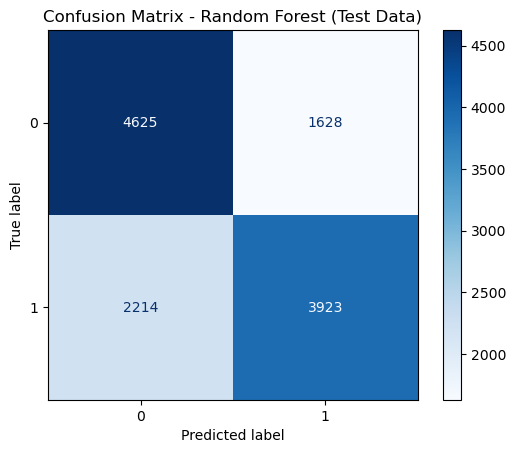

In [79]:
# Evaluate on train and test sets
y_pred_train_rf = best_rf.predict(X_train_rf)
y_pred_test_rf = best_rf.predict(X_test_rf)

# Calculate accuracy scores
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
print(f"Train Accuracy: {train_accuracy_rf:.3f}")
print(f"Test Accuracy: {test_accuracy_rf:.3f}")
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred_test_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_test_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest (Test Data)")
plt.show()

⤷ The Random Forest model achieved a test accuracy of 0.69. It correctly classified 4,625 out of 6,253 healthy individuals and 3,923 out of 6,137 individuals with cardiovascular disease. The recall was 0.74 for healthy individuals and 0.64 for those with cardiovascular disease, showing the model is somewhat more effective at detecting healthy cases but still captures a majority of disease cases.

However, it missed 2,214 true disease cases (false negatives), which means about 36% of patients with cardiovascular disease were not flagged. While the model performs similarly to Logistic Regression and Naive Bayes in overall accuracy, its slightly higher recall for cardiovascular disease makes it somewhat better for prioritizing disease detection.

AUC (Random Forest) = 0.727


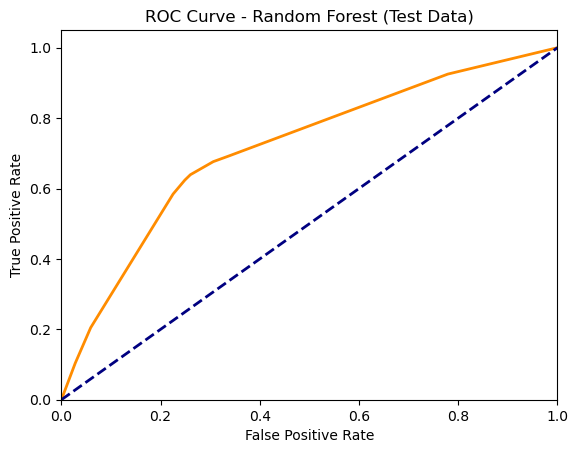

In [80]:
# --- ROC Curve and AUC ---
# Get predicted probabilities for the positive class (class 1)
y_probs_rf = best_rf.predict_proba(X_test_rf)[:, 1]

# Compute ROC curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
print(f"AUC (Random Forest) = {roc_auc_rf:.3f}")

# Plot AUC!!!
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("ROC Curve - Random Forest (Test Data)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

⤷ Our Random Forest model achieved an AUC of 0.727 on the test set, which indicates moderate discriminatory ability in distinguishing between healthy individuals and those with cardiovascular disease.

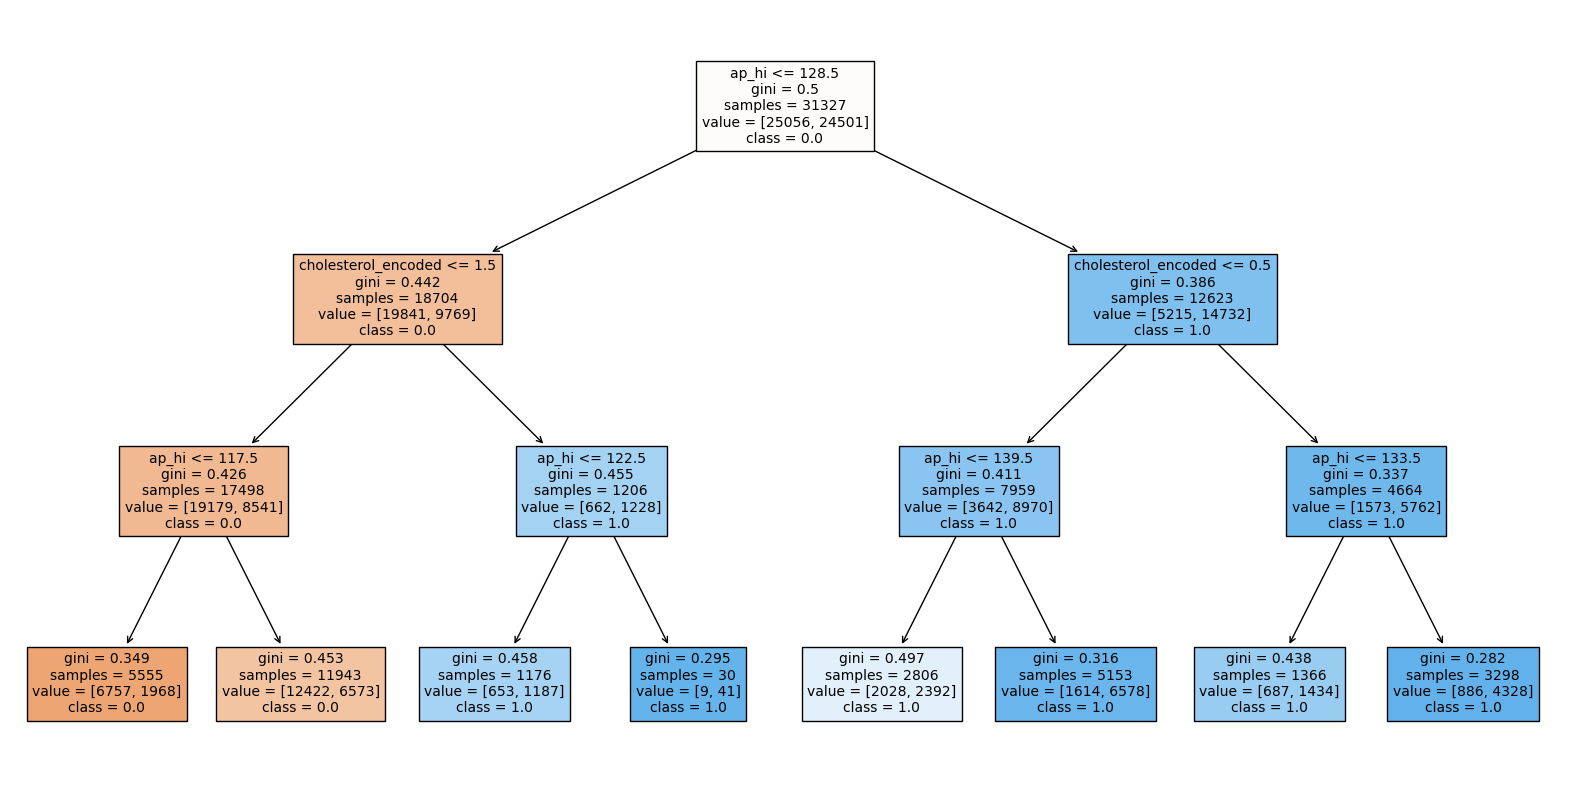

In [81]:
from sklearn.tree import plot_tree

# Pick the first tree from the forest
estimator = best_rf.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(
    estimator,
    feature_names=['ap_hi', 'cholesterol_encoded'],  # Add all features here
    class_names=[str(c) for c in estimator.classes_],
    filled=True,
    fontsize=10
)
plt.show()


##### This is a tree representing the work of our random forest
This decision tree from our Random Forest shows how systolic blood pressure (ap_hi) and cholesterol levels (cholesterol_encoded) are used to classify patients. The root split at systolic blood pressure at 128.5 separates most healthy individuals (left) from those likely to have cardiovascular disease (right). Further splits on cholesterol help refine predictions, with most low blood pressure and low cholesterol cases classified as healthy, while higher blood pressure and cholesterol cases are predicted as diseased. The terminal nodes are mostly pure (low Gini), showing the tree makes confident predictions.

# 5B. Model Comparison ⚖️ #

Let's see the ROC Curves of all our three models 

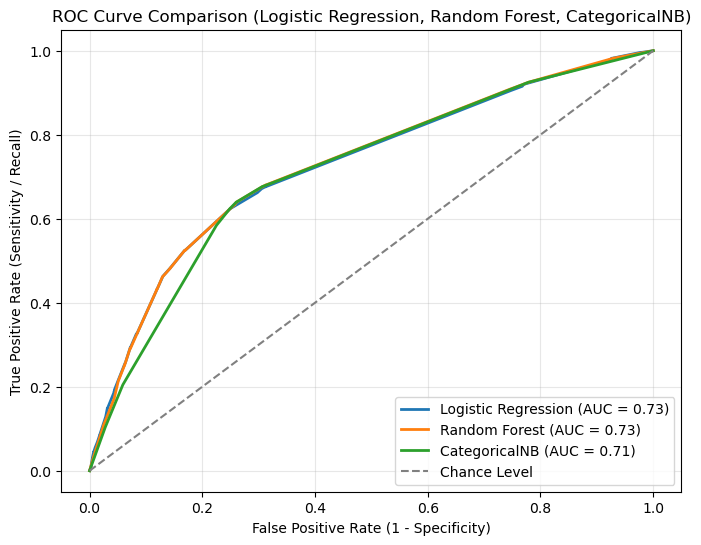

In [82]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (class 1) from each model
y_probs_lg = best_lg_model.predict_proba(X_test_binaryLR_scaled)[:, 1]  # Logistic Regression
y_probs_rf = best_rf.predict_proba(X_test_rf)[:, 1]                        # Random Forest
y_probs_cnb = cnb_model.predict_proba(X_test_binned)[:, 1]              # Categorical Naive Bayes

# Compute ROC curve and AUC for each model
fpr_lg, tpr_lg, _ = roc_curve(y_test, y_probs_lg)
auc_lg = roc_auc_score(y_test, y_probs_lg)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
auc_rf = roc_auc_score(y_test, y_probs_rf)

fpr_cnb, tpr_cnb, _ = roc_curve(y_test, y_probs_cnb)
auc_cnb = roc_auc_score(y_test, y_probs_cnb)

# Plot all ROC curves in one figure
plt.figure(figsize=(8, 6))
plt.plot(fpr_lg, tpr_lg, lw=2, label=f"Logistic Regression (AUC = {auc_lg:.2f})")
plt.plot(fpr_rf, tpr_rf, lw=2, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_cnb, tpr_cnb, lw=2, label=f"CategoricalNB (AUC = {auc_cnb:.2f})")

# Plot the random guessing line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Chance Level")

# Labels, title, and legend
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity / Recall)")
plt.title("ROC Curve Comparison (Logistic Regression, Random Forest, CategoricalNB)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

#### We can see that...
Logistic Regression and Random Forest both have AUC ≈ 0.73, which indicates moderate discriminatory ability (better than random guessing but far from perfect).

Categorical Naive Bayes is slightly worse with AUC ≈ 0.71. None of the models dominates across the full ROC curve — their curves are very close. Logistic Regression and Random Forest perform almost identically, while CategoricalNB lags slightly in the low false positive region.

All models have similar overall ability to separate patients with vs. without heart disease, but none is highly accurate by itself.

## 🧐Let's have a look at accuracy and recall of train and test dataset

In [83]:
from sklearn.metrics import accuracy_score

# Collect metrics into a dictionary for each model
accuracy_results = {
    "Model": ["Logistic Regression", "CategoricalNB", "Random Forest"],
    "Train Accuracy": [
        accuracy_score(y_train_binaryLR, y_train_pred_thresh),
        cnb_model.score(X_train_binned, y_train),
        accuracy_score(y_train, y_pred_train_rf)
    ],
    "Test Accuracy": [
        accuracy_score(y_test_pred_thresh, y_test),
        cnb_model.score(X_test_binned, y_test),
        accuracy_score(y_test, y_pred_test_rf)
    ]
}

# Convert to a DataFrame for a cleaner comparison
accuracy_df = pd.DataFrame(accuracy_results)

# Round to 3 decimals for readability
accuracy_df = accuracy_df.round(3)

print(accuracy_df)


                 Model  Train Accuracy  Test Accuracy
0  Logistic Regression           0.701          0.682
1        CategoricalNB           0.707          0.688
2        Random Forest           0.709          0.690


In [84]:
from sklearn.metrics import recall_score

# Collect Recall metrics into a dictionary for each model
recall_results = {
    "Model": ["Logistic Regression", "CategoricalNB", "Random Forest"],
    "Train Recall": [
        recall_score(y_train_binaryLR, y_train_pred_thresh),
        recall_score(y_train, cnb_model.predict(X_train_binned)),
        recall_score(y_train, y_pred_train_rf)
    ],
    "Test Recall": [
        recall_score(y_test_binaryLR, y_test_pred_thresh),
        recall_score(y_test, cnb_model.predict(X_test_binned)),
        recall_score(y_test, y_pred_test_rf)
    ]
}

# Convert to a DataFrame for cleaner comparison
recall_df = pd.DataFrame(recall_results)

# Round to 3 decimals for readability
recall_df = recall_df.round(3)
print("\n=== Recall for Cardiovascular Disease (Class 1) ===")
print(recall_df)


=== Recall for Cardiovascular Disease (Class 1) ===
                 Model  Train Recall  Test Recall
0  Logistic Regression         0.686        0.676
1        CategoricalNB         0.643        0.624
2        Random Forest         0.654        0.639


#### 📍 From the accuracy and recall of train and test dataset above, we can see that...

These accuracy and recall values are relatively similar across all three models — Random Forest is slightly better in accuracy and recall values. Both these 2 performance metrics showed a very small difference in values between train and test data, which indicated no overfitting problem and a good generalization of all three models

- Model Complexity and Interpretability

Logistic Regression is the most interpretable, with clear coefficients that indicate the direction and strength of each feature’s effect on the probability of cardiovascular disease. Stakeholders can easily understand.

Naive Bayes is also simple, but less intuitive because it works with probabilities under the independence assumption rather than weights. While it’s transparent, explaining decisions to non-technical audiences can be harder since it combines probabilities multiplicatively.

Random Forest is the most complex: it aggregates results from many decision trees, making it less transparent. Although feature importance scores and partial dependence plots can help interpret it, the actual decision-making process is not as straightforward. However, its complexity allows it to capture non-linear patterns that the other two models may miss.

- Robustness to Outliers and Noisy Data

Logistic Regression is sensitive to extreme values, which can distort the coefficients and the decision boundary. We mitigated this by applying RobustScaler, but the model still relies on linear relationships.

Naive Bayes is fairly robust because each feature’s probability is modeled independently. Outliers have limited influence, especially since we discretized ap_hi into bins, which reduces the effect of extreme blood pressure values. It is also here to note that we turned our continuous systolic blood pressure into ordinal categorical variables, which may also flatten out the effect of the continous values of the variable.

Random Forest is the most robust: it handles noise and outliers well because it averages across many trees, each of which only considers a subset of features and samples. Individual outliers rarely impact the ensemble’s overall decision.


- Computational Efficiency

Logistic Regression is also fast, though grid-searching across multiple solvers, penalties, and C values adds some computation.

Naive Bayes is the most efficient, with near-instant training and prediction since it relies on simple probability calculations and has only two hyperparameters (alpha, fit_prior).

Random Forest is the most computationally demanding, as it trains hundreds of trees and performs extensive hyperparameter tuning (n_estimators, max_depth, max_features). However, with parallelization (n_jobs=-1), training remained practical, and no significant computational bottlenecks occurred for our dataset. It took longer, but still functional on our computers.

# 6. Conclusion and Recommendations 

    🔥 Taken together, we chose Random Forest as our final model. Despite its complexity and longer (but still acceptable) training time, it provides the highest accuracy and recall for detecting cardiovascular disease, handles outliers and noise effectively, and captures the non-linear relationships in our features, systolic blood pressure and cholesterol level, making it the most suitable model for our disease prediction task.


- Model Fairness

Discuss how the models handle potential biases in the dataset, 
especially those related to demographic factors such as age, gender, or 
socioeconomic status. Does one model show particular sensitivity to these factors, 
and how does this affect the fairness of its predictions? 

We can see that in our original dataset, the categorical features have class imbalance. 
The dataset shows a significant overrepresentation of male over female. Most samples fall into the lowest categories of cholesterol and glucose levels, and the dataset is skewed towards healthy lifestyle of non-smokers, non-drinkers, and physically active individuals.  These imbalances may cause the model to generalize poorly for underrepresented subgroups, or in our case, the above normal cholesterol levels in our data.

The imbalanced features—such as gender, smoking, alcohol consumption, physical activity, and glucose levels—tend to have weaker predictive contributions and often become less influential after handling missing values or during Recursive Feature Elimination. While these features remain part of the analysis, their imbalance poses less risk of bias because they either contribute minimally to the final model or are downweighted during feature selection.

- Impact on Vulnerable Populations

Predictions affect older adults and those with high cholesterol. False negatives may delay treatment, while false positives cause stress and extra costs. Without proper threshold tuning and monitoring, the model could miss high-risk groups, worsening disparities.

- Transparency and Accountability:

Of the three models, Logistic Regression is the most interpretable because it provides clear coefficients, odds ratios, and decision boundaries. This transparency allows healthcare professionals and patients to understand why a prediction was made (e.g., which features contribute most to the outcome).

Naive Bayes is also interpretable, as it produces class-conditional probabilities, but it assumes independence between features, which may oversimplify explanations.

Random Forest, while often the most accurate, is less transparent due to the large number of trees and complex decision boundaries, making it harder for non-technical stakeholders to understand predictions. If we use the concept of decision tree to explain, this can ease the understanding of the process

- Data Privacy and Security

Since the dataset contains sensitive health information, strict measures must be taken to ensure privacy and compliance with GDPR and other relevant regulations. Patient data should be de-identified or pseudonymized before training, stored securely with encryption, and accessed only by authorized personnel. For deployment, encrypted pipelines and regular audits must be implemented to prevent data breaches and ensure trustworthiness in clinical settings.

- Future Work for Performance Improvements

To enhance the predictive performance and generalizability of the model, future efforts could include:

Incorporating additional features, such as lifestyle indicators (e.g., physical activity levels or BMI, which are available in our data), which could improve risk stratification.

More extensive hyperparameter tuning to refine model performance across different patient subgroups.

Collecting more diverse training data, including underrepresented age or demographic groups, to minimize bias and increase fairness.

- Scalability and Deployment

Deploying the model in real-world healthcare settings presents both opportunities and challenges.

Ease of Use: The current model requires only two key inputs—systolic blood pressure and cholesterol level—to provide predictions, making it simple to integrate into standard workflows without requiring complete EHR integration.

Regulatory Compliance: To be adopted clinically, the model must adhere to GDPR and potentially undergo medical device certification. These steps may extend timelines but are essential for legal and ethical deployment.

Scalability: Hosting the model as a secure, cloud-based API would allow easy integration across multiple clinics and minimize the need for local computational resources.

Continued Training: Ongoing data collection can be used to periodically retrain the model, ensuring that predictions remain accurate as population trends and health standards evolve.

Pilot Deployments: Introducing the model in limited clinical settings first can validate usability, accuracy, and acceptance before broader rollout.

# 7. Both members contribute equally to this project. 💪 💪 💪 